In [543]:
#Import all necessary liabraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import tensorflow.keras as keras
import tensorflow as tf
import seaborn as sns
%matplotlib inline 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, Callback
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Activation, Dropout
from keras.layers import Flatten
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.layers import LSTM, Dense
from keras.utils import plot_model
import matplotlib.pyplot as plt

In [544]:
maindata = pd.read_csv(r"/mnt/data/projects/shop_distribution_model/data_process/data_mart_shop_all_shops_complete_202204.csv",sep=";") #main dataframe
maindata

/tmp/ipykernel_4091903/3935746575.py:1: DtypeWarning: Columns (7,15) have mixed types. Specify dtype option on import or set low_memory=False.
  maindata = pd.read_csv(r"/mnt/data/projects/shop_distribution_model/data_process/data_mart_shop_all_shops_complete_202204.csv",sep=";") #main dataframe


,Unnamed: 0,rms_id,shop_name,shop_type,shop_type_id,sales_division,federal_state,zip,city,street,...,catch_area_sqkm_umts_2100_2,nbr_cellsumts_2100_3,pcvumts_2100_3,catch_area_sqkm_umts_2100_3,nbr_cellsgsm_1800,pcvgsm_1800,catch_area_sqkm_gsm_1800,nbr_cellsgsm_900,pcvgsm_900,catch_area_sqkm_gsm_900
0,0,200527558,Vodafone Shop Oberhausen,Partner shop,02 Vodafone-BPS,Niederlassung West,Nordrhein-Westfalen,46045,Oberhausen,Marktstr. 75,...,258.54,15.0,29.31,92.16,NaN,NaN,NaN,543.0,100.00,314.48
1,1,200527560,FH Ibrahim Yasar,Indirect shop,04 Vodafone-Fachhandel,Niederlassung West,Nordrhein-Westfalen,46145,Oberhausen,Bahnhofstr. 50,...,143.06,11.0,43.26,67.13,NaN,NaN,NaN,270.0,100.00,155.19
2,2,200527564,Vodafone Shop Xanten,Partner shop,02 Vodafone-BPS,Niederlassung West,Nordrhein-Westfalen,46509,Xanten,Marsstr. 24,...,782.38,10.0,2.60,23.20,4.0,2.35,20.93,225.0,100.00,891.02
3,3,200527565,Vodafone Shop Schermbeck,Partner shop,02 Vodafone-BPS,Niederlassung West,Nordrhein-Westfalen,46514,Schermbeck,Mittelstr. 66-70,...,577.93,23.0,15.87,124.76,NaN,NaN,NaN,344.0,99.61,783.03
4,4,200527566,Vodafone Shop Alpen,Partner shop,02 Vodafone-PA-Konzept,Niederlassung West,Nordrhein-Westfalen,46519,Alpen,Burgstr. 15,...,736.97,15.0,8.43,71.08,4.0,2.45,20.64,279.0,100.00,842.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441595,210808,203372081,Randy Nickel & Dennis Nickel GbR,Indirect shop,04 Vodafone-Fachhandel,Niederlassung Rhein-Main,Saarland,66113.0,Saarbrücken,Schillstr. 1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
441596,210809,203372083,Randy Nickel & Dennis Nickel GbR,Indirect shop,04 Vodafone-Fachhandel,Niederlassung Rhein-Main,Saarland,66125.0,Saarbrücken,Am Markt 1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
441597,210810,203372091,Ashop Solingen,Indirect shop,04 Vodafone-Fachhandel,Niederlassung West,Nordrhein-Westfalen,42697.0,Solingen,Düsseldorfer Str. 15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
441598,210811,203372094,Handyplanet,Indirect shop,04 Vodafone-Fachhandel,Niederlassung Rhein-Main,Hessen,35390.0,Gießen,Johannette-Lein-Gasse 18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [545]:
data = maindata.copy() #make a copy of original file

In [546]:
data2 = pd.read_excel("/mnt/data/projects/shop_distribution_model/data_mart_shop_columns.xlsx") #description of features 
data2

,shop_data_mart_column_en,shop_data_mart_column_en_v2,shop_data_mart_column_de,description_german,description_english,yoy_agg,aggregation,category,pandas_type,type,roundness,sorting,source,simu_recalc,prediction
0,rms_id,rms_id,rms_id,Shop Id,shop id,last,NaN,Shop information,str,str,NaN,1,Shop Master EXCEL,no,yes
1,name,shop_name,name,Shopbezeichnung,shop name,last,NaN,Shop information,str,str,NaN,2,Shop Master EXCEL,no,no
2,shop_type,shop_type,shoptyp,Shoptyp,shoptype,last,NaN,Shop information,str,str,NaN,3,Shop Master EXCEL,no,yes
3,shop_type_id,shop_type_id,shoptyp_id,Shoptyp id,shoptype id,last,NaN,Shop information,str,str,NaN,4,Shop Master EXCEL,no,yes
4,division,sales_division,division,"Division des Shops (Nord, Ost, Süd, West)",shop divison,last,NaN,Shop information,str,str,NaN,5,Shop Master EXCEL,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,pcvgsm_1800,pcvgsm_1800,pcvgsm_1800,Prozentualer Anteil der GSM 1800 Abdeckung,NaN,last,NaN,Network Data,float,int,2.0,227,NaN,NaN,yes
227,catch_area_sqkm_gsm_1800,catch_area_sqkm_gsm_1800,catch_area_sqkm_gsm_1800,Größe der Fläche der GSM 1800 Abdeckung im Ein...,NaN,last,NaN,Network Data,float,int,2.0,228,NaN,NaN,yes
228,nbr_cellsgsm_900,nbr_cellsgsm_900,nbr_cellsgsm_900,Anzahl an GSM 900 Zellen in dem Einzugsgebiet,NaN,last,NaN,Network Data,float,int,NaN,229,NaN,NaN,yes
229,pcvgsm_900,pcvgsm_900,pcvgsm_900,Prozentualer Anteil der GSM 900 Abdeckung,NaN,last,NaN,Network Data,float,int,2.0,230,NaN,NaN,yes


In [547]:
df_new = data2[['shop_data_mart_column_en_v2', 'prediction']]
df_new #Consider only the columns which has prediction = yes

,shop_data_mart_column_en_v2,prediction
0,rms_id,yes
1,shop_name,no
2,shop_type,yes
3,shop_type_id,yes
4,sales_division,yes
...,...,...
226,pcvgsm_1800,yes
227,catch_area_sqkm_gsm_1800,yes
228,nbr_cellsgsm_900,yes
229,pcvgsm_900,yes


In [548]:
final_data = data.loc[:,['rms_id','shop_type','shop_type_id','sales_division','federal_state','zip','city','street','dealer_lon','dealer_lat','shop_size_sqm_total','sales_area_sqm',
            'front_length_type','front_description','macrolayer','shop_status','rental_status','design_status','brickmortar_flg',
            'real_shop_flg','soho_flg','special_brands_flg','repair_service_flg','shop_site_id','operator','operator_id','catchment_in_sqm',
            'nearest_own_dist','nearest_partner_dist','own_shop_size_sqm_total','own_sales_area_sqm','own_frequenz','own_days','partner_shop_size_sqm_total',
            'partner_sales_area_sqm','partner_frequenz','partner_days','count_own_shops','count_partner','count_vf_shops','telekom_ownshop_count',
            'telekom_pa_count','o2_ownshop_count','o2_pa_count','competitor_count','visitor_frequency','days_frequency',
            'inflow_mobile','mob_subprl','inflow_dsl','inflow_cable','mean_cst_shop_distance','mean_age_cst','onl_mob_inflow','onl_mob_subprl',
            'onl_dsl_inflow','onl_cab_inflow','onl_avg_age_cst','comsns_total','opex_rent','opex_payroll','opex_other','opex_total',
            'shop_rent','rev_total','cost_total','contribution_margin','service_revenue','google_rating','google_rating_count','google_rating_ratio',
            'nof_nonuser','nof_storno','nof_complaint','nof_cont','tnps_nps_resp','tnps_nps_pro','tnps_nps_det','tnps_nss','gstar_val_sum',
            'gstar_resp','gstar_mean','nof_vor','netperform_users','netpf_avg_age_seg','netpf_avg_age','netpf_avg_age_vf_stars','netpf_inplz',
            'netpf_inplz_pct','netpf_shop_zip_pp','netpf_visitors_pp','netpf_avg_arpu','netpf_sum_arpu','netpf_visit_product','netpf_visit_prices',
            'netpf_contract_cycle','netpf_months_since_act','netpf_nbr_nofc','netpf_pct_nofc','netpf_nbr_cable','netpf_pct_cable',
            'netpf_nbr_subprl','netpf_pct_subprl','netpf_pct_winbacks','netpf_passers','netpf_visitors','hh','ew_hh','kk_idx','ra_1','ra_2',
            'ra_3','ra_4','ra_5','ra_6','resint','resint_sqkm','res_m','res_f','resint_0014','resint_1524','resint_2549','resint_5064','resint_65',
            'res_foreigners','lte_nbr_cells','lte_lte_area_sqkm','lte_pct_cov','umts_nbr_cells','umts_umts_area_sqkm','umts_pct_cov','gsm_nbr_cells',
            'gsm_gsm_area_sqkm','gsm_pct_gsm_cov','nbr_cellslte_800','pcvlte_800','catch_area_sqkm_lte_800','nbr_cellslte_1800',
            'pcvlte_1800','catch_area_sqkm_lte_1800','nbr_cellslte_2100','pcvlte_2100','catch_area_sqkm_lte_2100','nbr_cellslte_2600',
            'pcvlte_2600','catch_area_sqkm_lte_2600','nbr_cellsumts_2100_1','pcvumts_2100_1','catch_area_sqkm_umts_2100_1','nbr_cellsumts_2100_2',
            'pcvumts_2100_2','catch_area_sqkm_umts_2100_2','nbr_cellsumts_2100_3','pcvumts_2100_3','catch_area_sqkm_umts_2100_3','nbr_cellsgsm_1800',
            'pcvgsm_1800','catch_area_sqkm_gsm_1800','nbr_cellsgsm_900','pcvgsm_900','catch_area_sqkm_gsm_900','calmonth']]
final_data

,rms_id,shop_type,shop_type_id,sales_division,federal_state,zip,city,street,dealer_lon,dealer_lat,...,nbr_cellsumts_2100_3,pcvumts_2100_3,catch_area_sqkm_umts_2100_3,nbr_cellsgsm_1800,pcvgsm_1800,catch_area_sqkm_gsm_1800,nbr_cellsgsm_900,pcvgsm_900,catch_area_sqkm_gsm_900,calmonth
0,200527558,Partner shop,02 Vodafone-BPS,Niederlassung West,Nordrhein-Westfalen,46045,Oberhausen,Marktstr. 75,6.854367,51.468814,...,15.0,29.31,92.16,NaN,NaN,NaN,543.0,100.00,314.48,202010.0
1,200527560,Indirect shop,04 Vodafone-Fachhandel,Niederlassung West,Nordrhein-Westfalen,46145,Oberhausen,Bahnhofstr. 50,6.847591,51.514868,...,11.0,43.26,67.13,NaN,NaN,NaN,270.0,100.00,155.19,202010.0
2,200527564,Partner shop,02 Vodafone-BPS,Niederlassung West,Nordrhein-Westfalen,46509,Xanten,Marsstr. 24,6.455259,51.660313,...,10.0,2.60,23.20,4.0,2.35,20.93,225.0,100.00,891.02,202010.0
3,200527565,Partner shop,02 Vodafone-BPS,Niederlassung West,Nordrhein-Westfalen,46514,Schermbeck,Mittelstr. 66-70,6.873224,51.693933,...,23.0,15.87,124.76,NaN,NaN,NaN,344.0,99.61,783.03,202010.0
4,200527566,Partner shop,02 Vodafone-PA-Konzept,Niederlassung West,Nordrhein-Westfalen,46519,Alpen,Burgstr. 15,6.511817,51.575760,...,15.0,8.43,71.08,4.0,2.45,20.64,279.0,100.00,842.89,202010.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441595,203372081,Indirect shop,04 Vodafone-Fachhandel,Niederlassung Rhein-Main,Saarland,66113.0,Saarbrücken,Schillstr. 1,6.971168,49.243750,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,202009.0
441596,203372083,Indirect shop,04 Vodafone-Fachhandel,Niederlassung Rhein-Main,Saarland,66125.0,Saarbrücken,Am Markt 1,7.037261,49.275467,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,202009.0
441597,203372091,Indirect shop,04 Vodafone-Fachhandel,Niederlassung West,Nordrhein-Westfalen,42697.0,Solingen,Düsseldorfer Str. 15,7.002430,51.161256,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,202009.0
441598,203372094,Indirect shop,04 Vodafone-Fachhandel,Niederlassung Rhein-Main,Hessen,35390.0,Gießen,Johannette-Lein-Gasse 18,8.670732,50.585654,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,202009.0


In [549]:
final_data['shop_type'].unique() #chcek unique shop_types

array(['Partner shop', 'Indirect shop', 'Own shop', 'Other', nan],
      dtype=object)

In [550]:
final_data = final_data[final_data.shop_type != 'Other']  #not including other shop_types
final_data

,rms_id,shop_type,shop_type_id,sales_division,federal_state,zip,city,street,dealer_lon,dealer_lat,...,nbr_cellsumts_2100_3,pcvumts_2100_3,catch_area_sqkm_umts_2100_3,nbr_cellsgsm_1800,pcvgsm_1800,catch_area_sqkm_gsm_1800,nbr_cellsgsm_900,pcvgsm_900,catch_area_sqkm_gsm_900,calmonth
0,200527558,Partner shop,02 Vodafone-BPS,Niederlassung West,Nordrhein-Westfalen,46045,Oberhausen,Marktstr. 75,6.854367,51.468814,...,15.0,29.31,92.16,NaN,NaN,NaN,543.0,100.00,314.48,202010.0
1,200527560,Indirect shop,04 Vodafone-Fachhandel,Niederlassung West,Nordrhein-Westfalen,46145,Oberhausen,Bahnhofstr. 50,6.847591,51.514868,...,11.0,43.26,67.13,NaN,NaN,NaN,270.0,100.00,155.19,202010.0
2,200527564,Partner shop,02 Vodafone-BPS,Niederlassung West,Nordrhein-Westfalen,46509,Xanten,Marsstr. 24,6.455259,51.660313,...,10.0,2.60,23.20,4.0,2.35,20.93,225.0,100.00,891.02,202010.0
3,200527565,Partner shop,02 Vodafone-BPS,Niederlassung West,Nordrhein-Westfalen,46514,Schermbeck,Mittelstr. 66-70,6.873224,51.693933,...,23.0,15.87,124.76,NaN,NaN,NaN,344.0,99.61,783.03,202010.0
4,200527566,Partner shop,02 Vodafone-PA-Konzept,Niederlassung West,Nordrhein-Westfalen,46519,Alpen,Burgstr. 15,6.511817,51.575760,...,15.0,8.43,71.08,4.0,2.45,20.64,279.0,100.00,842.89,202010.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441595,203372081,Indirect shop,04 Vodafone-Fachhandel,Niederlassung Rhein-Main,Saarland,66113.0,Saarbrücken,Schillstr. 1,6.971168,49.243750,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,202009.0
441596,203372083,Indirect shop,04 Vodafone-Fachhandel,Niederlassung Rhein-Main,Saarland,66125.0,Saarbrücken,Am Markt 1,7.037261,49.275467,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,202009.0
441597,203372091,Indirect shop,04 Vodafone-Fachhandel,Niederlassung West,Nordrhein-Westfalen,42697.0,Solingen,Düsseldorfer Str. 15,7.002430,51.161256,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,202009.0
441598,203372094,Indirect shop,04 Vodafone-Fachhandel,Niederlassung Rhein-Main,Hessen,35390.0,Gießen,Johannette-Lein-Gasse 18,8.670732,50.585654,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,202009.0


In [551]:
final_data['shop_type'].unique()

array(['Partner shop', 'Indirect shop', 'Own shop', nan], dtype=object)

In [552]:
final_data['calmonth'].dtype #date column dtype

dtype('float64')

In [553]:
final_data['calmonth']=final_data['calmonth'].astype('int64') #change dtype

/tmp/ipykernel_4091903/1344418257.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['calmonth']=final_data['calmonth'].astype('int64') #change dtype


In [554]:
def process_calmonth(final_data):
    final_data['calmonth'] = final_data['calmonth'].apply(lambda x: str(x)[0:4]+ "-" +  str(x)[4:])  # set date column in proper format
    final_data.sort_values(by='calmonth', inplace=True)  # sort the dates
    final_data['calmonth'] = final_data['calmonth'].apply(lambda x: str(x)[-2:])  # set date column in proper format
    final_data['calmonth'] = final_data['calmonth'].astype('int64')  # change dtype to int64
    return final_data['calmonth']

result = process_calmonth(final_data)
print(result)

/tmp/ipykernel_4091903/878620754.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['calmonth'] = final_data['calmonth'].apply(lambda x: str(x)[0:4]+ "-" +  str(x)[4:])  # set date column in proper format


277899    6
354703    6
369107    6
268409    6
331511    6
         ..
225001    4
224999    4
224998    4
225013    4
222112    4
Name: calmonth, Length: 438196, dtype: int64


/tmp/ipykernel_4091903/878620754.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data.sort_values(by='calmonth', inplace=True)  # sort the dates
/tmp/ipykernel_4091903/878620754.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['calmonth'] = final_data['calmonth'].apply(lambda x: str(x)[-2:])  # set date column in proper format
/tmp/ipykernel_4091903/878620754.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [555]:
# Columns having missing values
missing_columns = [col for col in final_data.columns if final_data[col].isnull().sum() > 0]
missing_columns

['shop_type',
 'shop_type_id',
 'federal_state',
 'zip',
 'city',
 'street',
 'dealer_lon',
 'dealer_lat',
 'front_description',
 'macrolayer',
 'shop_status',
 'rental_status',
 'design_status',
 'shop_site_id',
 'operator',
 'operator_id',
 'catchment_in_sqm',
 'nearest_own_dist',
 'nearest_partner_dist',
 'own_shop_size_sqm_total',
 'own_sales_area_sqm',
 'own_frequenz',
 'own_days',
 'partner_shop_size_sqm_total',
 'partner_sales_area_sqm',
 'partner_frequenz',
 'partner_days',
 'count_own_shops',
 'count_partner',
 'count_vf_shops',
 'telekom_ownshop_count',
 'telekom_pa_count',
 'o2_ownshop_count',
 'o2_pa_count',
 'competitor_count',
 'visitor_frequency',
 'days_frequency',
 'inflow_mobile',
 'mob_subprl',
 'inflow_dsl',
 'inflow_cable',
 'mean_cst_shop_distance',
 'mean_age_cst',
 'onl_mob_inflow',
 'onl_mob_subprl',
 'onl_dsl_inflow',
 'onl_cab_inflow',
 'onl_avg_age_cst',
 'comsns_total',
 'opex_rent',
 'opex_payroll',
 'opex_other',
 'opex_total',
 'shop_rent',
 'rev_total',

In [556]:
#function to check the missing columns percenatge
def get_numerical_summary(final_data):
    total = final_data.shape[0]
    missing_columns = [col for col in final_data.columns if final_data[col].isnull().sum() > 0]
    missing_percent = {}
    for col in missing_columns:
        null_count = final_data[col].isnull().sum()
        per = (null_count/total) * 100
        missing_percent[col] = per
        print("{} : {} ({}%)".format(col, null_count, round(per, 3)))
    return missing_percent

# Check the missing values with percentage 
missing_percent = get_numerical_summary(final_data)

shop_type : 20176 (4.604%)
shop_type_id : 21190 (4.836%)
federal_state : 157 (0.036%)
zip : 21190 (4.836%)
city : 21190 (4.836%)
street : 21190 (4.836%)
dealer_lon : 21252 (4.85%)
dealer_lat : 21252 (4.85%)
front_description : 433779 (98.992%)
macrolayer : 1194 (0.272%)
shop_status : 32 (0.007%)
rental_status : 10134 (2.313%)
design_status : 16558 (3.779%)
shop_site_id : 48695 (11.113%)
operator : 6228 (1.421%)
operator_id : 48695 (11.113%)
catchment_in_sqm : 182835 (41.724%)
nearest_own_dist : 20196 (4.609%)
nearest_partner_dist : 20280 (4.628%)
own_shop_size_sqm_total : 25996 (5.933%)
own_sales_area_sqm : 25996 (5.933%)
own_frequenz : 178703 (40.782%)
own_days : 178703 (40.782%)
partner_shop_size_sqm_total : 26810 (6.118%)
partner_sales_area_sqm : 26810 (6.118%)
partner_frequenz : 127587 (29.116%)
partner_days : 127587 (29.116%)
count_own_shops : 182835 (41.724%)
count_partner : 182835 (41.724%)
count_vf_shops : 182835 (41.724%)
telekom_ownshop_count : 182835 (41.724%)
telekom_pa_cou

In [557]:
df_temp = final_data.copy()

In [558]:
# Threshold to remove attribute having missing values greater than threshold 
ATTRIBUTE_THRESHOLD = 75 #75% in this case 

for col, per in missing_percent.items():
    if per > ATTRIBUTE_THRESHOLD:
        df_temp.drop(col, axis=1 ,inplace = True)

In [559]:
df_temp

,rms_id,shop_type,shop_type_id,sales_division,federal_state,zip,city,street,dealer_lon,dealer_lat,...,nbr_cellsumts_2100_2,pcvumts_2100_2,catch_area_sqkm_umts_2100_2,nbr_cellsumts_2100_3,pcvumts_2100_3,catch_area_sqkm_umts_2100_3,nbr_cellsgsm_900,pcvgsm_900,catch_area_sqkm_gsm_900,calmonth
277899,200560910,Partner shop,NaN,Niederlassung Nord,Schleswig-Holstein,NaN,NaN,NaN,NaN,NaN,...,38.0,24.45,74.85,34.0,24.60,75.31,555.0,100.00,306.07,6
354703,203356495,Indirect shop,04 Vodafone-Fachhandel,Niederlassung Nord,Niedersachsen,27283.0,Verden,Große Str. 95,9.229076,52.919611,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
369107,203368437,Indirect shop,04 Vodafone-Fachhandel,Niederlassung Ost,Sachsen,1099.0,Dresden,Königsbrücker Str. 56,13.749542,51.069818,...,849.0,77.68,1285.56,142.0,35.37,585.34,731.0,99.71,1650.16,6
268409,200533748,Own shop,01 Vodafone-MFS-Store (RED-Store),Niederlassung Nord,Niedersachsen,38100.0,Braunschweig,Sack 23,10.521706,52.264530,...,103.0,74.60,582.43,18.0,19.87,155.15,256.0,100.00,780.79,6
331511,203345326,Indirect shop,04 Vodafone-Fachhandel,Niederlassung Ost,Sachsen,4229.0,Leipzig,Könneritzstr. 54,12.343202,51.323153,...,302.0,87.39,564.45,51.0,62.88,406.17,251.0,99.96,645.66,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225001,203333501,Indirect shop,04 Vodafone-Fachhandel,Niederlassung Ost,Thüringen,99099,Erfurt,Rudolstädter Str. 315,11.103619,50.951750,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
224999,203333480,Indirect shop,04 Vodafone-Fachhandel,Niederlassung Nord-West,Niedersachsen,37574,Einbeck,Lange Brücke 12,9.869112,51.818138,...,29.0,45.03,221.95,NaN,NaN,NaN,63.0,99.02,488.02,4
224998,203333473,Own shop,01 Vodafone-Filiale,Niederlassung Rhein-Main,Bayern,97070,Würzburg,Schönbornstr. 4,9.931155,49.795450,...,18.0,11.58,112.54,NaN,NaN,NaN,339.0,98.55,958.01,4
225013,203333697,Indirect shop,04 Vodafone-Fachhandel,Niederlassung Nord,Niedersachsen,29313,Hambühren,Sudermannstr. 2,9.959124,52.633473,...,72.0,48.00,162.00,1.0,1.29,4.36,84.0,100.00,337.51,4


In [560]:
#Check categorical features 
cat_var = [feature for feature in df_temp.columns if df_temp[feature].dtypes == 'O']

for feature in cat_var:
    df_temp[feature] = df_temp[feature].fillna(df_temp[feature].value_counts().idxmax()) # fill null value with idxmax

df_temp[cat_var].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438196 entries, 277899 to 222112
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   shop_type          438196 non-null  object
 1   shop_type_id       438196 non-null  object
 2   sales_division     438196 non-null  object
 3   federal_state      438196 non-null  object
 4   zip                438196 non-null  object
 5   city               438196 non-null  object
 6   street             438196 non-null  object
 7   front_length_type  438196 non-null  object
 8   macrolayer         438196 non-null  object
 9   shop_status        438196 non-null  object
 10  rental_status      438196 non-null  object
 11  design_status      438196 non-null  object
 12  shop_site_id       438196 non-null  object
 13  operator           438196 non-null  object
dtypes: object(14)
memory usage: 50.1+ MB


In [561]:
#Chcek numerical features in dataset
num_var = [feature for feature in df_temp.columns if df_temp[feature].dtypes != 'O']
df_temp[num_var] = df_temp[num_var].fillna(df_temp[num_var].median()) # fill null value with median

#chcek the info()
df_temp[num_var].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438196 entries, 277899 to 222112
Data columns (total 95 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   rms_id                       438196 non-null  int64  
 1   dealer_lon                   438196 non-null  float64
 2   dealer_lat                   438196 non-null  float64
 3   shop_size_sqm_total          438196 non-null  float64
 4   sales_area_sqm               438196 non-null  float64
 5   brickmortar_flg              438196 non-null  int64  
 6   real_shop_flg                438196 non-null  int64  
 7   soho_flg                     438196 non-null  int64  
 8   special_brands_flg           438196 non-null  int64  
 9   repair_service_flg           438196 non-null  int64  
 10  operator_id                  438196 non-null  float64
 11  catchment_in_sqm             438196 non-null  float64
 12  nearest_own_dist             438196 non-null  float64

In [562]:
#categorical features
objList = df_temp.select_dtypes(include = "object").columns
print (objList)

Index(['shop_type', 'shop_type_id', 'sales_division', 'federal_state', 'zip',
       'city', 'street', 'front_length_type', 'macrolayer', 'shop_status',
       'rental_status', 'design_status', 'shop_site_id', 'operator'],
      dtype='object')


In [563]:
le = LabelEncoder()

# Encode the "ShopType" column
df_temp["shop_type"] = le.fit_transform(df_temp["shop_type"].astype(str))

print("Mapping for ShopType:\n")
for code, value in enumerate(le.classes_):
    print(f"Encoded value {code}: {value}")

Mapping for ShopType:

Encoded value 0: Indirect shop
Encoded value 1: Own shop
Encoded value 2: Partner shop


In [564]:
date_column = 'calmonth' 

obj_List = df_temp.select_dtypes(include='object').columns
obj_List = obj_List[obj_List != date_column]
obj_List

Index(['shop_type_id', 'sales_division', 'federal_state', 'zip', 'city',
       'street', 'front_length_type', 'macrolayer', 'shop_status',
       'rental_status', 'design_status', 'shop_site_id', 'operator'],
      dtype='object')

In [565]:
le = LabelEncoder()

for feat in objList:
    if feat != date_column:
        df_temp[feat] = le.fit_transform(df_temp[feat].astype(str))

print(df_temp.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438196 entries, 277899 to 222112
Columns: 109 entries, rms_id to calmonth
dtypes: float64(88), int64(21)
memory usage: 367.7 MB
None


In [566]:
df_temp

,rms_id,shop_type,shop_type_id,sales_division,federal_state,zip,city,street,dealer_lon,dealer_lat,...,nbr_cellsumts_2100_2,pcvumts_2100_2,catch_area_sqkm_umts_2100_2,nbr_cellsumts_2100_3,pcvumts_2100_3,catch_area_sqkm_umts_2100_3,nbr_cellsgsm_900,pcvgsm_900,catch_area_sqkm_gsm_900,calmonth
277899,200560910,2,10,1,14,3862,260,1030,9.498022,51.154263,...,38.0,24.45,74.85,34.0,24.60,75.31,555.0,100.00,306.07,6
354703,203356495,0,10,1,8,1492,2351,3876,9.229076,52.919611,...,111.0,70.12,316.32,16.0,24.02,105.91,182.0,99.98,515.18,6
369107,203368437,0,10,4,12,344,538,6430,13.749542,51.069818,...,849.0,77.68,1285.56,142.0,35.37,585.34,731.0,99.71,1650.16,6
268409,200533748,1,2,1,8,2243,347,9482,10.521706,52.264530,...,103.0,74.60,582.43,18.0,19.87,155.15,256.0,100.00,780.79,6
331511,203345326,0,10,4,12,2546,1336,6483,12.343202,51.323153,...,302.0,87.39,564.45,51.0,62.88,406.17,251.0,99.96,645.66,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225001,203333501,0,10,4,15,6347,636,9377,11.103619,50.951750,...,111.0,70.12,316.32,16.0,24.02,105.91,182.0,99.98,515.18,4
224999,203333480,0,10,3,8,2229,588,6549,9.869112,51.818138,...,29.0,45.03,221.95,16.0,24.02,105.91,63.0,99.02,488.02,4
224998,203333473,1,1,5,1,6200,2595,9915,9.931155,49.795450,...,18.0,11.58,112.54,16.0,24.02,105.91,339.0,98.55,958.01,4
225013,203333697,0,10,1,8,1657,932,10512,9.959124,52.633473,...,72.0,48.00,162.00,1.0,1.29,4.36,84.0,100.00,337.51,4


In [567]:
df_temp.reset_index(inplace=True)

**Keras Sequential Model**

In [568]:
df_temp

,index,rms_id,shop_type,shop_type_id,sales_division,federal_state,zip,city,street,dealer_lon,...,nbr_cellsumts_2100_2,pcvumts_2100_2,catch_area_sqkm_umts_2100_2,nbr_cellsumts_2100_3,pcvumts_2100_3,catch_area_sqkm_umts_2100_3,nbr_cellsgsm_900,pcvgsm_900,catch_area_sqkm_gsm_900,calmonth
0,277899,200560910,2,10,1,14,3862,260,1030,9.498022,...,38.0,24.45,74.85,34.0,24.60,75.31,555.0,100.00,306.07,6
1,354703,203356495,0,10,1,8,1492,2351,3876,9.229076,...,111.0,70.12,316.32,16.0,24.02,105.91,182.0,99.98,515.18,6
2,369107,203368437,0,10,4,12,344,538,6430,13.749542,...,849.0,77.68,1285.56,142.0,35.37,585.34,731.0,99.71,1650.16,6
3,268409,200533748,1,2,1,8,2243,347,9482,10.521706,...,103.0,74.60,582.43,18.0,19.87,155.15,256.0,100.00,780.79,6
4,331511,203345326,0,10,4,12,2546,1336,6483,12.343202,...,302.0,87.39,564.45,51.0,62.88,406.17,251.0,99.96,645.66,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438191,225001,203333501,0,10,4,15,6347,636,9377,11.103619,...,111.0,70.12,316.32,16.0,24.02,105.91,182.0,99.98,515.18,4
438192,224999,203333480,0,10,3,8,2229,588,6549,9.869112,...,29.0,45.03,221.95,16.0,24.02,105.91,63.0,99.02,488.02,4
438193,224998,203333473,1,1,5,1,6200,2595,9915,9.931155,...,18.0,11.58,112.54,16.0,24.02,105.91,339.0,98.55,958.01,4
438194,225013,203333697,0,10,1,8,1657,932,10512,9.959124,...,72.0,48.00,162.00,1.0,1.29,4.36,84.0,100.00,337.51,4


In [569]:
# Create the training set
groups = df_temp.groupby(['rms_id', 'shop_type', 'calmonth'])
train = groups.apply(lambda g: g.sample(frac=0.5))

train.reset_index(drop=True, inplace=True)

In [570]:
train

,index,rms_id,shop_type,shop_type_id,sales_division,federal_state,zip,city,street,dealer_lon,...,nbr_cellsumts_2100_2,pcvumts_2100_2,catch_area_sqkm_umts_2100_2,nbr_cellsumts_2100_3,pcvumts_2100_3,catch_area_sqkm_umts_2100_3,nbr_cellsgsm_900,pcvgsm_900,catch_area_sqkm_gsm_900,calmonth
0,230794,200527558,2,3,8,9,2830,1697,7405,6.854388,...,364.0,82.21,258.54,15.0,29.31,92.16,543.0,100.00,314.48,1
1,230806,200527558,2,3,8,9,2830,1697,7405,6.854388,...,364.0,82.21,258.54,15.0,29.31,92.16,543.0,100.00,314.48,1
2,230795,200527558,2,3,8,9,2830,1697,7405,6.854388,...,364.0,82.21,258.54,15.0,29.31,92.16,543.0,100.00,314.48,2
3,55398,200527558,2,3,8,9,2829,1697,7405,6.854367,...,364.0,82.21,258.54,15.0,29.31,92.16,543.0,100.00,314.48,2
4,230808,200527558,2,3,8,9,2830,1697,7405,6.854388,...,364.0,82.21,258.54,15.0,29.31,92.16,543.0,100.00,314.48,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171001,221168,203377549,0,10,1,8,1721,940,1584,9.718858,...,111.0,70.12,316.32,16.0,24.02,105.91,182.0,99.98,515.18,3
171002,230780,203377549,0,10,1,8,1722,940,1584,9.718858,...,111.0,70.12,316.32,16.0,24.02,105.91,182.0,99.98,515.18,4
171003,13876,203377549,0,10,1,8,1721,940,1584,9.718858,...,111.0,70.12,316.32,16.0,24.02,105.91,182.0,99.98,515.18,10
171004,180159,203377549,0,10,1,8,1721,940,1584,9.718858,...,111.0,70.12,316.32,16.0,24.02,105.91,182.0,99.98,515.18,11


In [571]:
remaining_df = df_temp.loc[~df_temp['index'].isin(train['index'])]

In [572]:
remaining_df

,index,rms_id,shop_type,shop_type_id,sales_division,federal_state,zip,city,street,dealer_lon,...,nbr_cellsumts_2100_2,pcvumts_2100_2,catch_area_sqkm_umts_2100_2,nbr_cellsumts_2100_3,pcvumts_2100_3,catch_area_sqkm_umts_2100_3,nbr_cellsgsm_900,pcvgsm_900,catch_area_sqkm_gsm_900,calmonth
0,277899,200560910,2,10,1,14,3862,260,1030,9.498022,...,38.0,24.45,74.85,34.0,24.60,75.31,555.0,100.00,306.07,6
1,354703,203356495,0,10,1,8,1492,2351,3876,9.229076,...,111.0,70.12,316.32,16.0,24.02,105.91,182.0,99.98,515.18,6
3,268409,200533748,1,2,1,8,2243,347,9482,10.521706,...,103.0,74.60,582.43,18.0,19.87,155.15,256.0,100.00,780.79,6
6,268461,200534968,2,4,2,2,423,260,1053,13.403690,...,67.0,50.27,171.34,18.0,36.54,124.53,594.0,100.00,340.81,6
9,268513,200534971,2,3,7,0,4456,683,8702,9.218242,...,505.0,79.16,341.59,72.0,45.41,195.95,629.0,100.00,431.53,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438190,225002,203333510,0,10,2,13,2327,824,5181,11.814464,...,315.0,85.16,1089.90,37.0,38.67,494.93,303.0,99.81,1277.49,4
438191,225001,203333501,0,10,4,15,6347,636,9377,11.103619,...,111.0,70.12,316.32,16.0,24.02,105.91,182.0,99.98,515.18,4
438192,224999,203333480,0,10,3,8,2229,588,6549,9.869112,...,29.0,45.03,221.95,16.0,24.02,105.91,63.0,99.02,488.02,4
438194,225013,203333697,0,10,1,8,1657,932,10512,9.959124,...,72.0,48.00,162.00,1.0,1.29,4.36,84.0,100.00,337.51,4


In [573]:
# Create the validation set
remaining_groups = remaining_df.groupby(['rms_id', 'shop_type', 'calmonth'])
validation = remaining_groups.apply(lambda g: g.sample(frac=0.3))

validation.reset_index(drop=True, inplace=True)

In [574]:
validation

,index,rms_id,shop_type,shop_type_id,sales_division,federal_state,zip,city,street,dealer_lon,...,nbr_cellsumts_2100_2,pcvumts_2100_2,catch_area_sqkm_umts_2100_2,nbr_cellsumts_2100_3,pcvumts_2100_3,catch_area_sqkm_umts_2100_3,nbr_cellsgsm_900,pcvgsm_900,catch_area_sqkm_gsm_900,calmonth
0,398502,200527558,2,3,8,9,2830,1697,7405,6.854367,...,364.0,82.21,258.54,15.0,29.31,92.16,543.0,100.00,314.48,1
1,201903,200527558,2,3,8,9,2829,1697,7405,6.854367,...,364.0,82.21,258.54,15.0,29.31,92.16,543.0,100.00,314.48,2
2,230796,200527558,2,3,8,9,2830,1697,7405,6.854388,...,364.0,82.21,258.54,15.0,29.31,92.16,543.0,100.00,314.48,3
3,230809,200527558,2,3,8,9,2830,1697,7405,6.854388,...,364.0,82.21,258.54,15.0,29.31,92.16,543.0,100.00,314.48,4
4,230810,200527558,2,3,8,9,2830,1697,7405,6.854388,...,364.0,82.21,258.54,15.0,29.31,92.16,543.0,100.00,314.48,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53299,141771,203371727,0,10,1,8,1076,1767,9021,8.900679,...,111.0,70.12,316.32,16.0,24.02,105.91,182.0,99.98,515.18,8
53300,441563,203371727,0,10,1,8,1077,1767,9021,8.900679,...,111.0,70.12,316.32,16.0,24.02,105.91,182.0,99.98,515.18,9
53301,11785,203371727,0,10,1,8,1076,1767,9021,8.900679,...,111.0,70.12,316.32,16.0,24.02,105.91,182.0,99.98,515.18,10
53302,374546,203371727,0,10,1,8,1077,1767,9021,8.900661,...,111.0,70.12,316.32,16.0,24.02,105.91,182.0,99.98,515.18,11


In [575]:
remaining_df = remaining_df.loc[~remaining_df['index'].isin(validation['index'])]
test_groups = remaining_df.groupby(['rms_id', 'shop_type', 'calmonth'])

test = test_groups.apply(lambda g: g.sample(frac=0.3))
test.reset_index(drop=True, inplace=True)

In [576]:
test

,index,rms_id,shop_type,shop_type_id,sales_division,federal_state,zip,city,street,dealer_lon,...,nbr_cellsumts_2100_2,pcvumts_2100_2,catch_area_sqkm_umts_2100_2,nbr_cellsumts_2100_3,pcvumts_2100_3,catch_area_sqkm_umts_2100_3,nbr_cellsgsm_900,pcvgsm_900,catch_area_sqkm_gsm_900,calmonth
0,192242,200527558,2,3,8,9,2829,1697,7405,6.854367,...,364.0,82.21,258.54,15.0,29.31,92.16,543.0,100.00,314.48,1
1,230807,200527558,2,3,8,9,2830,1697,7405,6.854388,...,364.0,82.21,258.54,15.0,29.31,92.16,543.0,100.00,314.48,2
2,69140,200527558,2,3,8,9,2829,1697,7405,6.854367,...,364.0,82.21,258.54,15.0,29.31,92.16,543.0,100.00,314.48,3
3,82853,200527558,2,3,8,9,2829,1697,7405,6.854367,...,364.0,82.21,258.54,15.0,29.31,92.16,543.0,100.00,314.48,4
4,422449,200527558,2,3,8,9,2830,1697,7405,6.854367,...,364.0,82.21,258.54,15.0,29.31,92.16,543.0,100.00,314.48,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44557,374543,203371727,0,10,1,8,1077,1767,9021,8.900661,...,111.0,70.12,316.32,16.0,24.02,105.91,182.0,99.98,515.18,8
44558,384104,203371727,0,10,1,8,1077,1767,9021,8.900661,...,111.0,70.12,316.32,16.0,24.02,105.91,182.0,99.98,515.18,9
44559,388891,203371727,0,10,1,8,1077,1767,9021,8.900679,...,111.0,70.12,316.32,16.0,24.02,105.91,182.0,99.98,515.18,10
44560,178133,203371727,0,10,1,8,1076,1767,9021,8.900679,...,111.0,70.12,316.32,16.0,24.02,105.91,182.0,99.98,515.18,11


In [577]:
common_rows = pd.merge(train, validation, indicator=True, how='outer') #check if there are any common rows in train and validation set
print(common_rows["_merge"].value_counts())

left_only     171006
right_only     53304
both               0
Name: _merge, dtype: int64


In [578]:
common_rows_train_test = pd.merge(train, test, indicator=True, how='outer')  #check if there are any common rows in train and test set
print(common_rows_train_test["_merge"].value_counts())

left_only     171006
right_only     44562
both               0
Name: _merge, dtype: int64


In [579]:
common_rows_val_test = pd.merge(validation, test, indicator=True, how='outer')  #check if there are any common rows in validation and test set
print(common_rows_val_test["_merge"].value_counts())

left_only     53304
right_only    44562
both              0
Name: _merge, dtype: int64


In [580]:
X_train = train.drop(columns=['inflow_mobile'])
y_train = train['inflow_mobile'] #target column
X_valid = validation.drop(columns=['inflow_mobile'])
y_valid = validation['inflow_mobile']
X_test = test.drop(columns=['inflow_mobile'])
y_test = test['inflow_mobile']

In [581]:
X_train

,index,rms_id,shop_type,shop_type_id,sales_division,federal_state,zip,city,street,dealer_lon,...,nbr_cellsumts_2100_2,pcvumts_2100_2,catch_area_sqkm_umts_2100_2,nbr_cellsumts_2100_3,pcvumts_2100_3,catch_area_sqkm_umts_2100_3,nbr_cellsgsm_900,pcvgsm_900,catch_area_sqkm_gsm_900,calmonth
0,230794,200527558,2,3,8,9,2830,1697,7405,6.854388,...,364.0,82.21,258.54,15.0,29.31,92.16,543.0,100.00,314.48,1
1,230806,200527558,2,3,8,9,2830,1697,7405,6.854388,...,364.0,82.21,258.54,15.0,29.31,92.16,543.0,100.00,314.48,1
2,230795,200527558,2,3,8,9,2830,1697,7405,6.854388,...,364.0,82.21,258.54,15.0,29.31,92.16,543.0,100.00,314.48,2
3,55398,200527558,2,3,8,9,2829,1697,7405,6.854367,...,364.0,82.21,258.54,15.0,29.31,92.16,543.0,100.00,314.48,2
4,230808,200527558,2,3,8,9,2830,1697,7405,6.854388,...,364.0,82.21,258.54,15.0,29.31,92.16,543.0,100.00,314.48,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171001,221168,203377549,0,10,1,8,1721,940,1584,9.718858,...,111.0,70.12,316.32,16.0,24.02,105.91,182.0,99.98,515.18,3
171002,230780,203377549,0,10,1,8,1722,940,1584,9.718858,...,111.0,70.12,316.32,16.0,24.02,105.91,182.0,99.98,515.18,4
171003,13876,203377549,0,10,1,8,1721,940,1584,9.718858,...,111.0,70.12,316.32,16.0,24.02,105.91,182.0,99.98,515.18,10
171004,180159,203377549,0,10,1,8,1721,940,1584,9.718858,...,111.0,70.12,316.32,16.0,24.02,105.91,182.0,99.98,515.18,11


In [582]:
y_train

0         54.0
1         47.0
2         39.0
3          5.0
4         42.0
          ... 
171001     4.0
171002     4.0
171003     4.0
171004     4.0
171005     4.0
Name: inflow_mobile, Length: 171006, dtype: float64

In [583]:
X_valid

,index,rms_id,shop_type,shop_type_id,sales_division,federal_state,zip,city,street,dealer_lon,...,nbr_cellsumts_2100_2,pcvumts_2100_2,catch_area_sqkm_umts_2100_2,nbr_cellsumts_2100_3,pcvumts_2100_3,catch_area_sqkm_umts_2100_3,nbr_cellsgsm_900,pcvgsm_900,catch_area_sqkm_gsm_900,calmonth
0,398502,200527558,2,3,8,9,2830,1697,7405,6.854367,...,364.0,82.21,258.54,15.0,29.31,92.16,543.0,100.00,314.48,1
1,201903,200527558,2,3,8,9,2829,1697,7405,6.854367,...,364.0,82.21,258.54,15.0,29.31,92.16,543.0,100.00,314.48,2
2,230796,200527558,2,3,8,9,2830,1697,7405,6.854388,...,364.0,82.21,258.54,15.0,29.31,92.16,543.0,100.00,314.48,3
3,230809,200527558,2,3,8,9,2830,1697,7405,6.854388,...,364.0,82.21,258.54,15.0,29.31,92.16,543.0,100.00,314.48,4
4,230810,200527558,2,3,8,9,2830,1697,7405,6.854388,...,364.0,82.21,258.54,15.0,29.31,92.16,543.0,100.00,314.48,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53299,141771,203371727,0,10,1,8,1076,1767,9021,8.900679,...,111.0,70.12,316.32,16.0,24.02,105.91,182.0,99.98,515.18,8
53300,441563,203371727,0,10,1,8,1077,1767,9021,8.900679,...,111.0,70.12,316.32,16.0,24.02,105.91,182.0,99.98,515.18,9
53301,11785,203371727,0,10,1,8,1076,1767,9021,8.900679,...,111.0,70.12,316.32,16.0,24.02,105.91,182.0,99.98,515.18,10
53302,374546,203371727,0,10,1,8,1077,1767,9021,8.900661,...,111.0,70.12,316.32,16.0,24.02,105.91,182.0,99.98,515.18,11


In [584]:
y_valid

0        32.0
1         8.0
2        54.0
3        28.0
4        34.0
         ... 
53299     0.0
53300     2.0
53301     4.0
53302     4.0
53303     4.0
Name: inflow_mobile, Length: 53304, dtype: float64

In [585]:
X_test

,index,rms_id,shop_type,shop_type_id,sales_division,federal_state,zip,city,street,dealer_lon,...,nbr_cellsumts_2100_2,pcvumts_2100_2,catch_area_sqkm_umts_2100_2,nbr_cellsumts_2100_3,pcvumts_2100_3,catch_area_sqkm_umts_2100_3,nbr_cellsgsm_900,pcvgsm_900,catch_area_sqkm_gsm_900,calmonth
0,192242,200527558,2,3,8,9,2829,1697,7405,6.854367,...,364.0,82.21,258.54,15.0,29.31,92.16,543.0,100.00,314.48,1
1,230807,200527558,2,3,8,9,2830,1697,7405,6.854388,...,364.0,82.21,258.54,15.0,29.31,92.16,543.0,100.00,314.48,2
2,69140,200527558,2,3,8,9,2829,1697,7405,6.854367,...,364.0,82.21,258.54,15.0,29.31,92.16,543.0,100.00,314.48,3
3,82853,200527558,2,3,8,9,2829,1697,7405,6.854367,...,364.0,82.21,258.54,15.0,29.31,92.16,543.0,100.00,314.48,4
4,422449,200527558,2,3,8,9,2830,1697,7405,6.854367,...,364.0,82.21,258.54,15.0,29.31,92.16,543.0,100.00,314.48,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44557,374543,203371727,0,10,1,8,1077,1767,9021,8.900661,...,111.0,70.12,316.32,16.0,24.02,105.91,182.0,99.98,515.18,8
44558,384104,203371727,0,10,1,8,1077,1767,9021,8.900661,...,111.0,70.12,316.32,16.0,24.02,105.91,182.0,99.98,515.18,9
44559,388891,203371727,0,10,1,8,1077,1767,9021,8.900679,...,111.0,70.12,316.32,16.0,24.02,105.91,182.0,99.98,515.18,10
44560,178133,203371727,0,10,1,8,1076,1767,9021,8.900679,...,111.0,70.12,316.32,16.0,24.02,105.91,182.0,99.98,515.18,11


In [586]:
y_test

0         5.0
1        30.0
2        23.0
3         8.0
4        33.0
         ... 
44557     4.0
44558     6.0
44559     7.0
44560     0.0
44561     0.0
Name: inflow_mobile, Length: 44562, dtype: float64

In [587]:
#Define function for plotting loss
def plot_loss(history, model_name):
    model_history = pd.DataFrame(history.history)
    model_history['epoch'] = history.epoch

    fig, ax = plt.subplots(2,1, figsize=(12,8))

    # Plot training loss
    ax[0].semilogy(model_history['epoch'], model_history['loss'], label='Training Loss')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss')
    ax[0].set_title(f'{model_name} Training Loss')
    ax[0].legend()

    # Plot validation loss
    ax[1].semilogy(model_history['epoch'], model_history['val_loss'], label='Validation Loss')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Loss')
    ax[1].set_title(f'{model_name} Validation Loss')
    ax[1].legend()

    plt.tight_layout()
    plt.show()

In [588]:
def train_model(X_train, y_train, X_valid, y_valid, epochs=20, batch_size=32):
    model = Sequential()
    model.add(Dense(1024, input_shape=(X_train.shape[1],), activation='relu'))
    model.add(Dense(1))

    # Compile the model
    model.compile(loss='mean_absolute_error', optimizer='adam')

    # Print the model summary
    model.summary()

    # Define the EarlyStopping and ModelCheckpoint callbacks
    early_stop = EarlyStopping(monitor='val_loss', patience=6)
    checkpoint = ModelCheckpoint('best_weights.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')

    # Train the model
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_valid, y_valid), callbacks=[early_stop, checkpoint])

    return model, history

In [589]:
model_1, history_1 = train_model(X_train, y_train, X_valid, y_valid)

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_81 (Dense)            (None, 1024)              112640    
                                                                 
 dense_82 (Dense)            (None, 1)                 1025      
                                                                 
Total params: 113,665
Trainable params: 113,665
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
5344/5344 [==============================] - ETA: 0s - loss: 465074.4688
Epoch 1: val_loss improved from inf to 296031.37500, saving model to best_weights.h5
5344/5344 [==============================] - 13s 2ms/step - loss: 465074.4688 - val_loss: 296031.3750
Epoch 2/20
5344/5344 [==============================] - ETA: 0s - loss: 225248.5781
Epoch 2: val_loss improved from 296031.37500 to 121974.25781, saving model to best_weigh

In [590]:
# Evaluate the model
test_loss = model_1.evaluate(X_test, y_test)
print(f'Test loss: {test_loss}')

1393/1393 [==============================] - 2s 1ms/step - loss: 12.5931
Test loss: 12.593124389648438


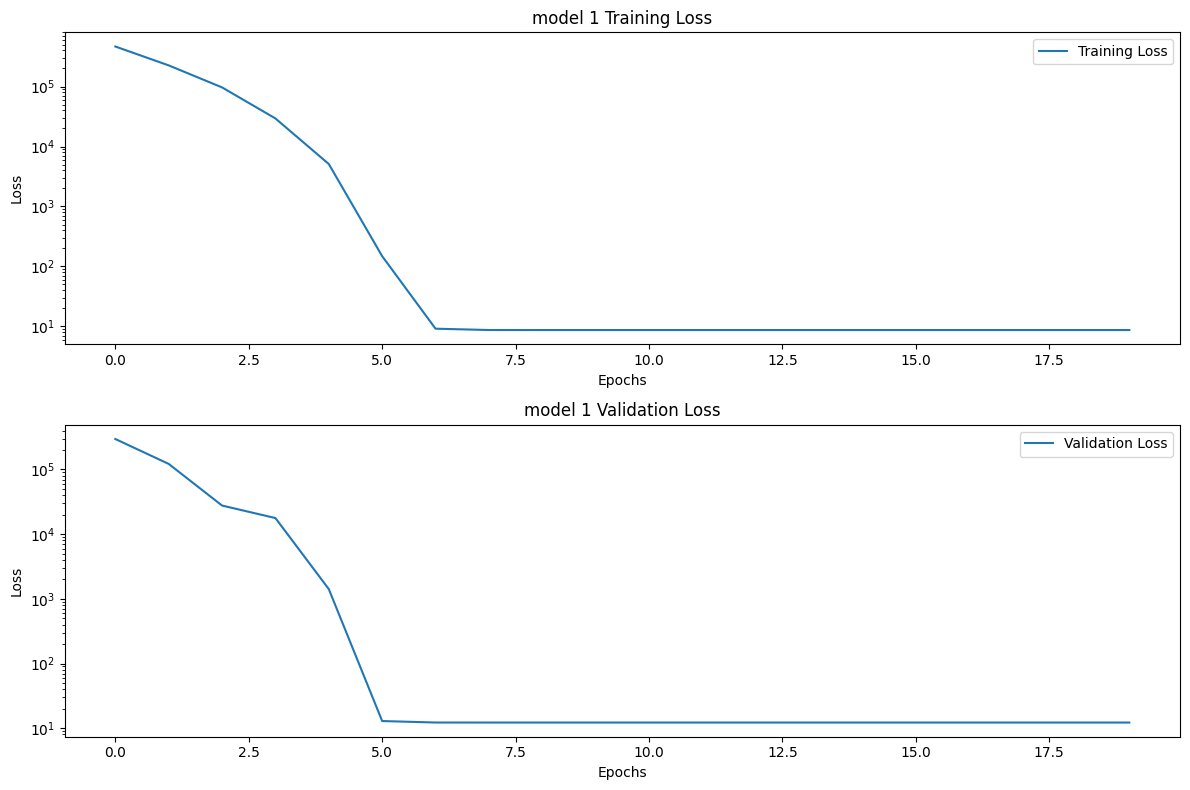

In [591]:
plot_loss(history_1, 'model 1')

In [592]:
def train_model_2(X_train, y_train, X_valid, y_valid, epochs=50, batch_size=32):
    model = Sequential()
    model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))

    # Compile the model
    model.compile(loss='mean_absolute_error', optimizer='adam')

    # Print the model summary
    model.summary()

    # Define the EarlyStopping and ModelCheckpoint callbacks
    early_stop = EarlyStopping(monitor='val_loss', patience=3)
    checkpoint = ModelCheckpoint('best_weights_2.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')

    # Train the model
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_valid, y_valid), callbacks=[early_stop, checkpoint])

    return model, history

In [593]:
model_2, history_2 = train_model_2(X_train, y_train, X_valid, y_valid)

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_83 (Dense)            (None, 64)                7040      
                                                                 
 dense_84 (Dense)            (None, 32)                2080      
                                                                 
 dense_85 (Dense)            (None, 1)                 33        
                                                                 
Total params: 9,153
Trainable params: 9,153
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
5344/5344 [==============================] - ETA: 0s - loss: 139479.6719
Epoch 1: val_loss improved from inf to 176156.78125, saving model to best_weights_2.h5
5344/5344 [==============================] - 10s 2ms/step - loss: 139479.6719 - val_loss: 176156.7812
Epoch 2/50
5305/5344 [====================

In [594]:
# Evaluate the model
test_loss = model_2.evaluate(X_test, y_test)
print(f'Test loss: {test_loss}')

1393/1393 [==============================] - 2s 1ms/step - loss: 12.5806
Test loss: 12.580626487731934


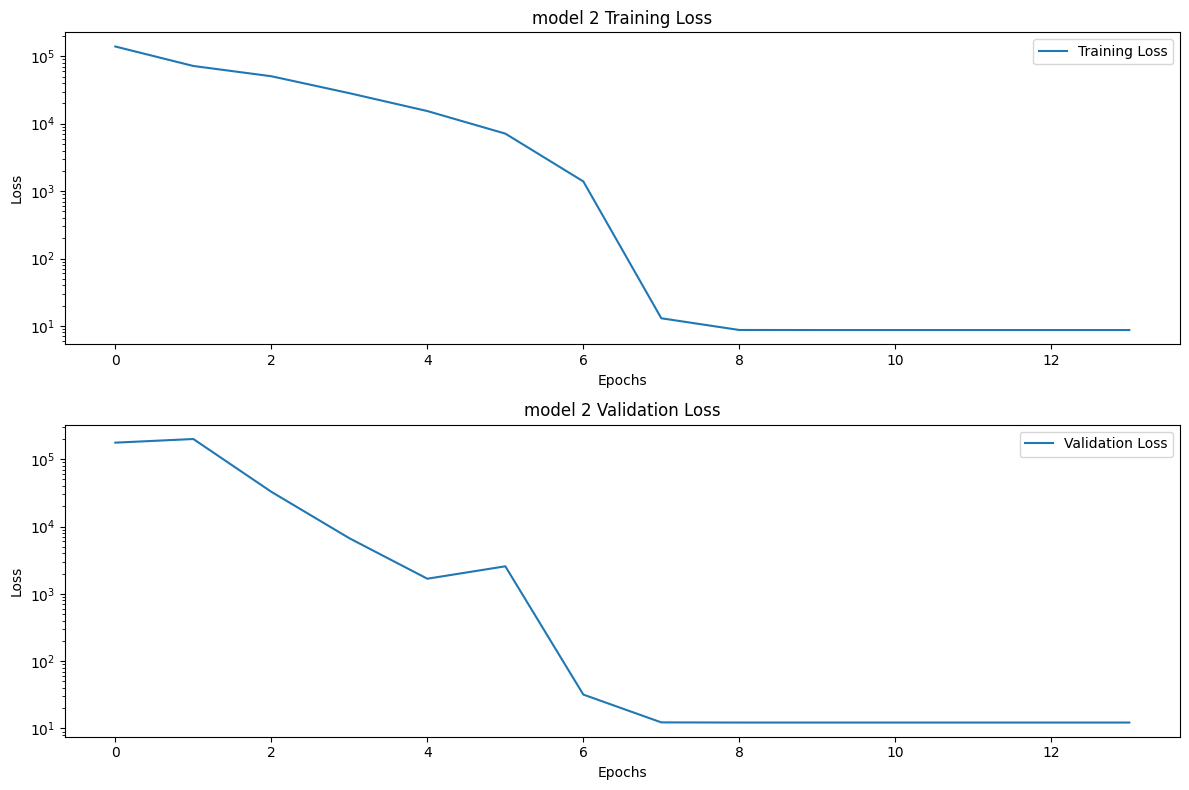

In [595]:
plot_loss(history_2, 'model 2')

In [596]:
def train_model_3(X_train, y_train, X_valid, y_valid, epochs=50, batch_size=32):
    model = Sequential()
    model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1))

    # Compile the model
    model.compile(loss='mean_absolute_error', optimizer='adam')

    # Print the model summary
    model.summary()

    # Define the EarlyStopping and ModelCheckpoint callbacks
    early_stop = EarlyStopping(monitor='val_loss', patience=3)
    checkpoint = ModelCheckpoint('best_weights_2.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')

    # Train the model
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_valid, y_valid), callbacks=[early_stop, checkpoint])

    return model, history

In [597]:
model_3, history_3 = train_model_3(X_train, y_train, X_valid, y_valid)

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_86 (Dense)            (None, 64)                7040      
                                                                 
 dense_87 (Dense)            (None, 32)                2080      
                                                                 
 dense_88 (Dense)            (None, 16)                528       
                                                                 
 dense_89 (Dense)            (None, 1)                 17        
                                                                 
Total params: 9,665
Trainable params: 9,665
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
5322/5344 [============================>.] - ETA: 0s - loss: 89568.9297
Epoch 1: val_loss improved from inf to 7388.55273, saving model to best_weights_2.h5
5344/5344 [====

In [598]:
# Evaluate the model
test_loss = model_3.evaluate(X_test, y_test)
print(f'Test loss: {test_loss}')

1393/1393 [==============================] - 2s 1ms/step - loss: 12.5809
Test loss: 12.580873489379883


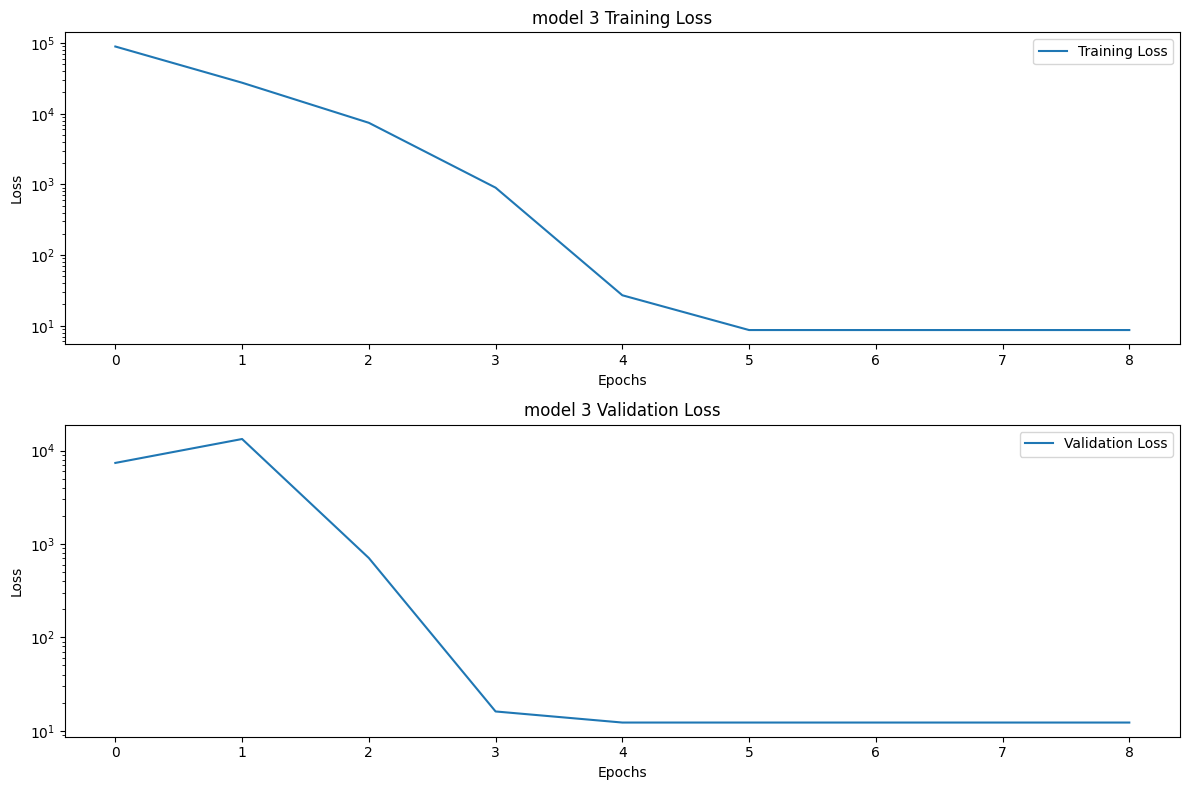

In [599]:
plot_loss(history_3, 'model 3')

In [600]:
def train_model_4(X_train, y_train, X_valid, y_valid, epochs=50, batch_size=32):
    model = Sequential()
    model.add(Dense(256, input_shape=(X_train.shape[1],), activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))

    # Compile the model
    model.compile(loss='mean_absolute_error', optimizer='adam')

    # Print the model summary
    model.summary()

    # Define the EarlyStopping and ModelCheckpoint callbacks
    early_stop = EarlyStopping(monitor='val_loss', patience=6)
    checkpoint = ModelCheckpoint('best_weights_2.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')

    # Train the model
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_valid, y_valid), callbacks=[early_stop, checkpoint])

    return model, history

In [601]:
model_4, history_4 = train_model_4(X_train, y_train, X_valid, y_valid)

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_90 (Dense)            (None, 256)               28160     
                                                                 
 dense_91 (Dense)            (None, 128)               32896     
                                                                 
 dense_92 (Dense)            (None, 64)                8256      
                                                                 
 dense_93 (Dense)            (None, 32)                2080      
                                                                 
 dense_94 (Dense)            (None, 1)                 33        
                                                                 
Total params: 71,425
Trainable params: 71,425
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
5336/5344 [===========================

In [602]:
# Evaluate the model
test_loss = model_4.evaluate(X_test, y_test)
print(f'Test loss: {test_loss}')

1393/1393 [==============================] - 2s 1ms/step - loss: 12.5819
Test loss: 12.581933975219727


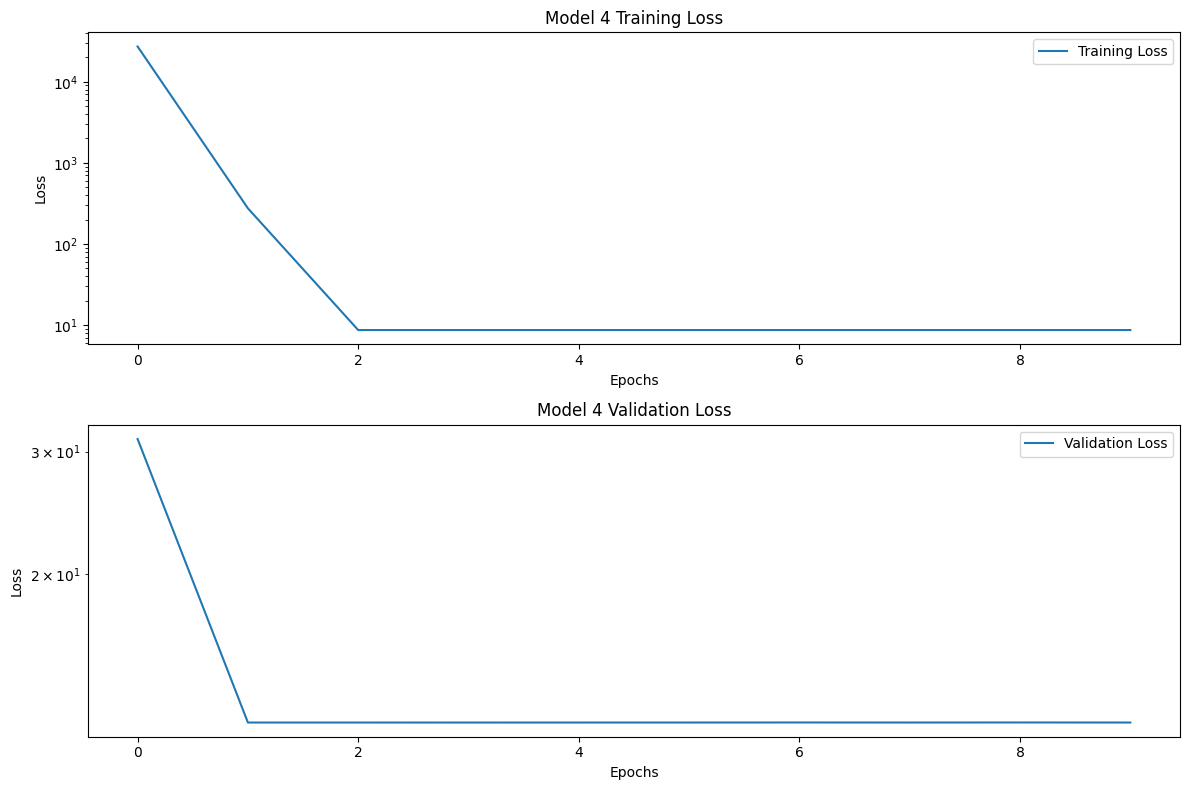

In [603]:
plot_loss(history_4, 'Model 4')

In [604]:
def train_model_5(X_train, y_train, X_valid, y_valid, epochs=50, batch_size=32):
    model = Sequential()
    model.add(Dense(32, input_shape=(X_train.shape[1],), activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1))

    # Compile the model
    model.compile(loss='mean_absolute_error', optimizer='adam')

    # Print the model summary
    model.summary()

    # Define the EarlyStopping and ModelCheckpoint callbacks
    early_stop = EarlyStopping(monitor='val_loss', patience=6)
    checkpoint = ModelCheckpoint('best_weights_2.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')

    # Train the model
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_valid, y_valid), callbacks=[early_stop, checkpoint])

    return model, history

In [605]:
model_5, history_5 = train_model_5(X_train, y_train, X_valid, y_valid)

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_95 (Dense)            (None, 32)                3520      
                                                                 
 dense_96 (Dense)            (None, 16)                528       
                                                                 
 dense_97 (Dense)            (None, 8)                 136       
                                                                 
 dense_98 (Dense)            (None, 1)                 9         
                                                                 
Total params: 4,193
Trainable params: 4,193
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
5317/5344 [============================>.] - ETA: 0s - loss: 203509.3125
Epoch 1: val_loss improved from inf to 33774.61328, saving model to best_weights_2.h5
5344/5344 [==

In [606]:
# Evaluate the model
test_loss = model_5.evaluate(X_test, y_test)
print(f'Test loss: {test_loss}')

1393/1393 [==============================] - 2s 1ms/step - loss: 12.5809
Test loss: 12.580876350402832


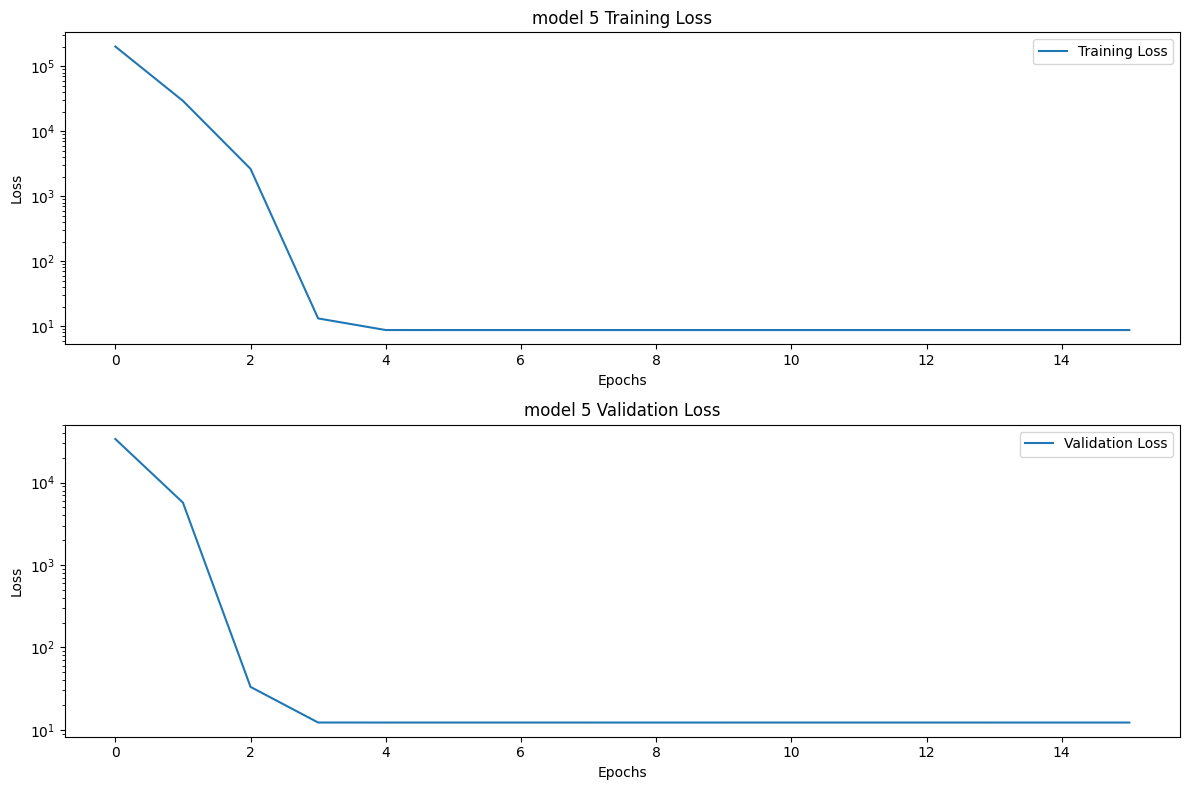

In [607]:
plot_loss(history_5, 'model 5')

In [608]:
model_3.save('dense_model.h5')

In [609]:
# Load the trained model
model = keras.models.load_model('dense_model.h5')
model.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_86 (Dense)            (None, 64)                7040      
                                                                 
 dense_87 (Dense)            (None, 32)                2080      
                                                                 
 dense_88 (Dense)            (None, 16)                528       
                                                                 
 dense_89 (Dense)            (None, 1)                 17        
                                                                 
Total params: 9,665
Trainable params: 9,665
Non-trainable params: 0
_________________________________________________________________


In [610]:
mae = mean_absolute_error(y_test, y_pred)

In [611]:
mae

12.58120256394588

1393/1393 [==============================] - 2s 1ms/step


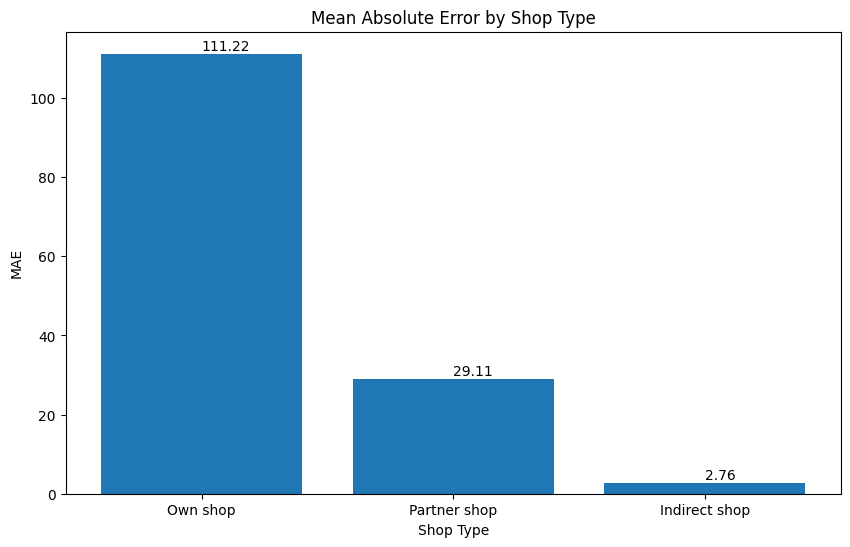

In [612]:
shop_type_mapping = {0: 'Indirect shop', 1: 'Own shop', 2: 'Partner shop'}

y_pred = model.predict(X_test)

mae_by_shop_type = {}
for shop_type in X_test['shop_type'].unique():                                                       
    mask = X_test['shop_type'] == shop_type
    mae = mean_absolute_error(y_test[mask], y_pred[mask])
    mae_by_shop_type[shop_type_mapping[shop_type]] = mae


sorted_data = sorted(mae_by_shop_type.items(), key=lambda x: x[1], reverse=True)
shop_types, mae_values = zip(*sorted_data)

x_ticks = range(len(shop_types))

plt.figure(figsize=(10, 6))
bars = plt.bar(x_ticks, mae_values)
plt.xlabel('Shop Type')
plt.ylabel('MAE')
plt.title('Mean Absolute Error by Shop Type')
plt.xticks(x_ticks, shop_types)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 2), va='bottom')
    
plt.show()

In [613]:
mae

111.21569367674961

In [614]:
mae_by_shop_type 

{'Partner shop': 29.112225895995028,
 'Indirect shop': 2.7582991739644305,
 'Own shop': 111.21569367674961}

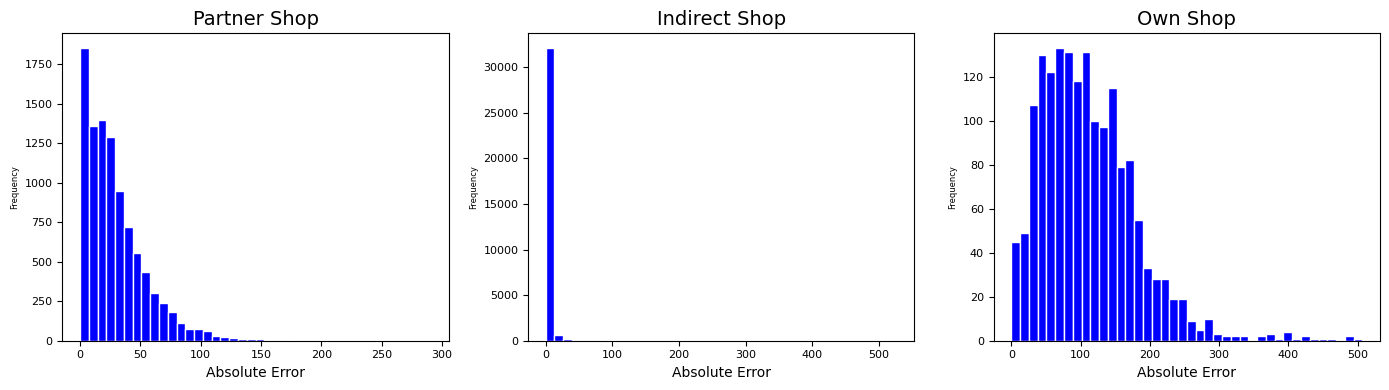

In [615]:
abs_error = np.abs(y_test - y_pred.flatten())

shop_types = X_test['shop_type'].unique()

shop_type_names = ["Partner Shop", "Indirect Shop", "Own Shop"]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14,4))
axes = axes.flatten()

for i, shop_type in enumerate(shop_types):
    idx = X_test['shop_type'] == shop_type
    axes[i].hist(abs_error[idx], bins=40, histtype="barstacked", color="blue", rwidth=6, edgecolor="white")
    axes[i].set_title(f"{shop_type_names[i]}", fontsize=14)
    axes[i].set_xlabel("Absolute Error", fontsize=10)
    axes[i].set_ylabel("Frequency", fontsize=6)
    axes[i].tick_params(axis='both', which='major', labelsize=8) 
    
plt.tight_layout()
plt.show()

In [616]:
def evaluate_preds(y_true, y_pred):
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)

    # Calculate various metrics
    mae = tf.reduce_mean(tf.keras.metrics.mean_absolute_error(y_true, y_pred))
    mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) 
    mse = tf.reduce_mean(mse)
    rmse = tf.sqrt(mse)
    #mape = tf.reduce_mean(tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred))
    #mase = mean_absolute_scaled_error(y_true, y_pred)

    return {"mae": mae.numpy(),
            "mse": mse.numpy(),
            "rmse": rmse.numpy()}
            #"mape": mape.numpy()}
            #"mase": mase.numpy()}

In [617]:
def plot_metrics(metrics):
    names = list(metrics.keys())
    values = list(metrics.values())
    colors = ['blue', 'orange', 'green','Yellow']  

    plt.figure(figsize=(10, 5))
    plt.bar(names, values, color=colors)
    plt.title('Evaluation Metrics')
    plt.ylabel('Value')
    plt.ylim([0, max(values)*1.2])  
    plt.show()

In [618]:
metrics = evaluate_preds(y_test, y_pred)
metrics

{'mae': 12.580918, 'mse': 1052.0427, 'rmse': 32.435207}

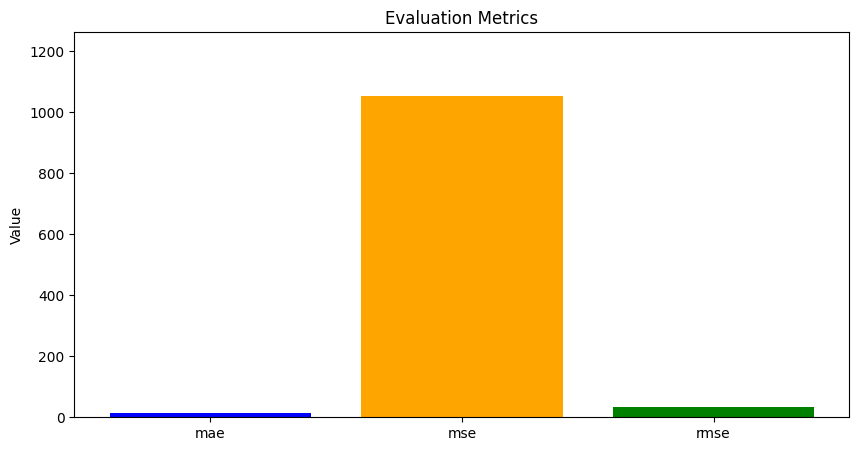

In [619]:
# Plot the metrics
plot_metrics(metrics)

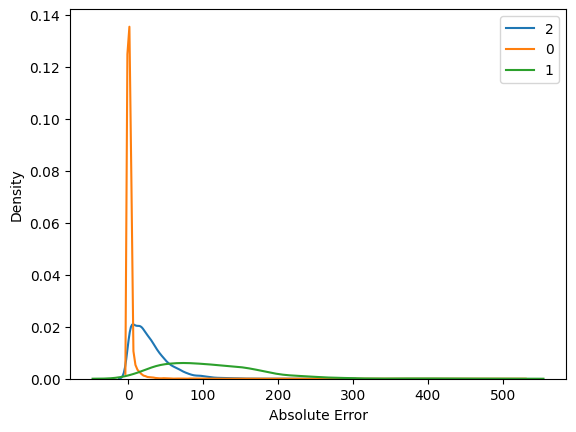

In [620]:
for shop_type in shop_types:
    idx = X_test['shop_type'] == shop_type
    sns.kdeplot(abs_error[idx], label=shop_type)

plt.xlabel('Absolute Error')
plt.ylabel('Density')
plt.legend()
plt.show()

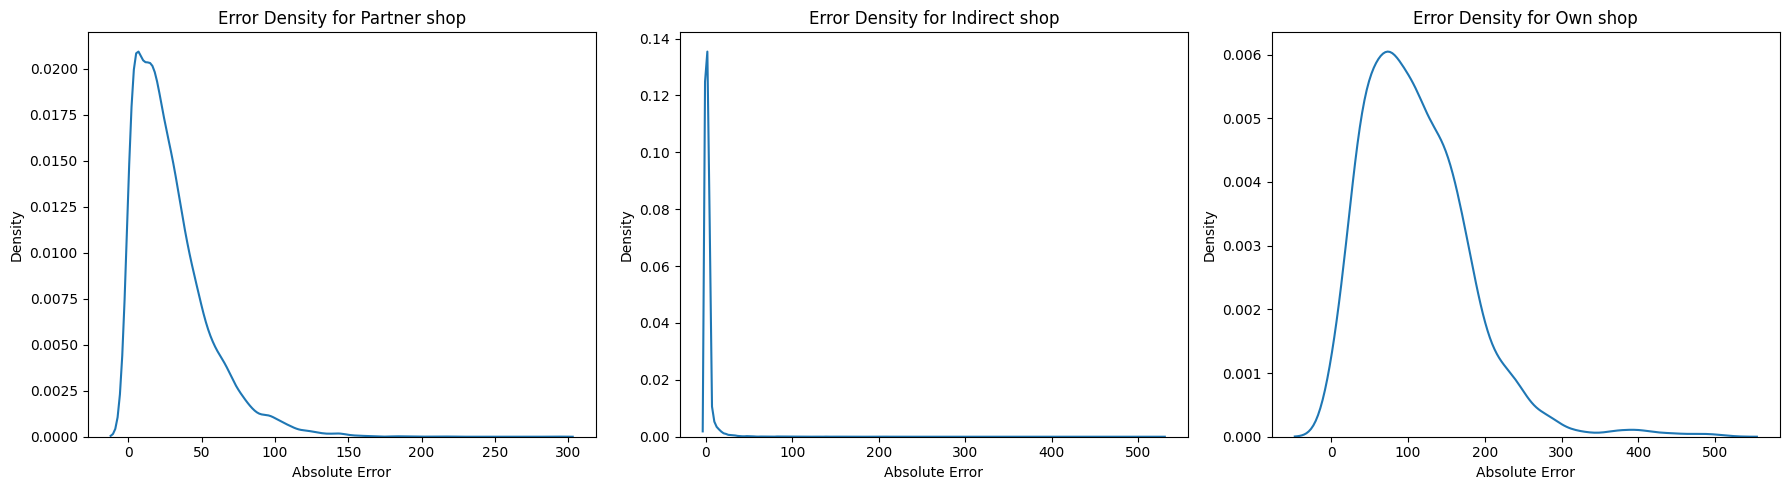

In [621]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18,5)) 
axes = axes.flatten()

shop_type_array = X_test['shop_type'].unique()

# Mapping from encoded shop types to shop type names
shop_type_mapping = {0: 'Indirect shop', 1: 'Own shop', 2: 'Partner shop'}

for i, shop_type in enumerate(shop_type_array):
    idx = X_test['shop_type'] == shop_type
    sns.kdeplot(abs_error[idx], ax=axes[i])
    # Use the mapping here
    axes[i].set_title(f"Error Density for {shop_type_mapping[shop_type]}")
    axes[i].set_xlabel("Absolute Error")
    axes[i].set_ylabel("Density")

plt.tight_layout()
plt.show()

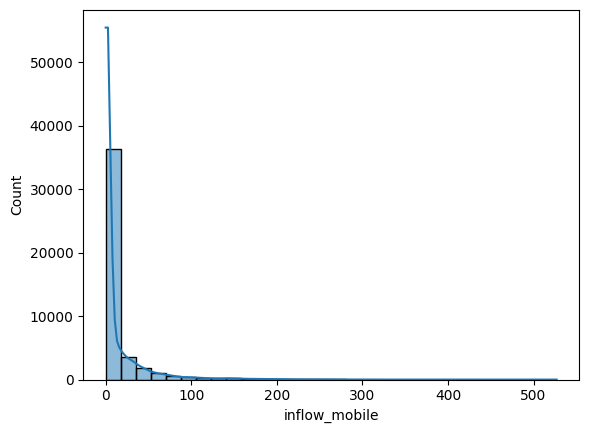

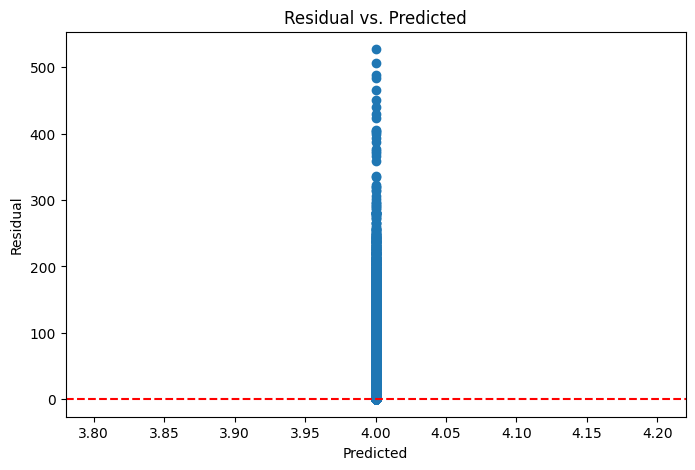

In [622]:
import seaborn as sns

sns.histplot(abs_error, bins=30, kde=True)

# Scatter plot of predicted vs. error
plt.figure(figsize=(8,5))
plt.scatter(y_pred , abs_error)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual vs. Predicted')
plt.show()

***LSTM***

In [629]:
#Define function to create window
def create_dataset(dataset, target, window_size):
    dataX, dataY = [], []
    for i in range(len(dataset)-window_size-1):
        a = dataset[i:(i+window_size)]
        dataX.append(a)
        dataY.append(target[i + window_size])
    return np.array(dataX), np.array(dataY)

In [630]:
window_size = 3

train_values = train.drop(['inflow_mobile'], axis=1).values
train_target = train['inflow_mobile'].values

validation_values = validation.drop(['inflow_mobile'], axis=1).values
validation_target = validation['inflow_mobile'].values

test_values = test.drop(['inflow_mobile'], axis=1).values
test_target = test['inflow_mobile'].values

trainX, trainY = create_dataset(train_values, train_target, window_size)
validationX, validationY = create_dataset(validation_values, validation_target, window_size)
testX, testY = create_dataset(test_values, test_target, window_size)

In [631]:
trainX

array([[[2.30794000e+05, 2.00527558e+08, 2.00000000e+00, ...,
         1.00000000e+02, 3.14480000e+02, 1.00000000e+00],
        [2.30806000e+05, 2.00527558e+08, 2.00000000e+00, ...,
         1.00000000e+02, 3.14480000e+02, 1.00000000e+00],
        [2.30795000e+05, 2.00527558e+08, 2.00000000e+00, ...,
         1.00000000e+02, 3.14480000e+02, 2.00000000e+00]],

       [[2.30806000e+05, 2.00527558e+08, 2.00000000e+00, ...,
         1.00000000e+02, 3.14480000e+02, 1.00000000e+00],
        [2.30795000e+05, 2.00527558e+08, 2.00000000e+00, ...,
         1.00000000e+02, 3.14480000e+02, 2.00000000e+00],
        [5.53980000e+04, 2.00527558e+08, 2.00000000e+00, ...,
         1.00000000e+02, 3.14480000e+02, 2.00000000e+00]],

       [[2.30795000e+05, 2.00527558e+08, 2.00000000e+00, ...,
         1.00000000e+02, 3.14480000e+02, 2.00000000e+00],
        [5.53980000e+04, 2.00527558e+08, 2.00000000e+00, ...,
         1.00000000e+02, 3.14480000e+02, 2.00000000e+00],
        [2.30808000e+05, 2.00527558e

In [632]:
trainY

array([ 5., 42., 14., ...,  4.,  4.,  4.])

In [633]:
validationX

array([[[3.98502000e+05, 2.00527558e+08, 2.00000000e+00, ...,
         1.00000000e+02, 3.14480000e+02, 1.00000000e+00],
        [2.01903000e+05, 2.00527558e+08, 2.00000000e+00, ...,
         1.00000000e+02, 3.14480000e+02, 2.00000000e+00],
        [2.30796000e+05, 2.00527558e+08, 2.00000000e+00, ...,
         1.00000000e+02, 3.14480000e+02, 3.00000000e+00]],

       [[2.01903000e+05, 2.00527558e+08, 2.00000000e+00, ...,
         1.00000000e+02, 3.14480000e+02, 2.00000000e+00],
        [2.30796000e+05, 2.00527558e+08, 2.00000000e+00, ...,
         1.00000000e+02, 3.14480000e+02, 3.00000000e+00],
        [2.30809000e+05, 2.00527558e+08, 2.00000000e+00, ...,
         1.00000000e+02, 3.14480000e+02, 4.00000000e+00]],

       [[2.30796000e+05, 2.00527558e+08, 2.00000000e+00, ...,
         1.00000000e+02, 3.14480000e+02, 3.00000000e+00],
        [2.30809000e+05, 2.00527558e+08, 2.00000000e+00, ...,
         1.00000000e+02, 3.14480000e+02, 4.00000000e+00],
        [2.30810000e+05, 2.00527558e

In [634]:
validationY

array([28., 34., 34., ...,  2.,  4.,  4.])

In [635]:
testX

array([[[1.92242000e+05, 2.00527558e+08, 2.00000000e+00, ...,
         1.00000000e+02, 3.14480000e+02, 1.00000000e+00],
        [2.30807000e+05, 2.00527558e+08, 2.00000000e+00, ...,
         1.00000000e+02, 3.14480000e+02, 2.00000000e+00],
        [6.91400000e+04, 2.00527558e+08, 2.00000000e+00, ...,
         1.00000000e+02, 3.14480000e+02, 3.00000000e+00]],

       [[2.30807000e+05, 2.00527558e+08, 2.00000000e+00, ...,
         1.00000000e+02, 3.14480000e+02, 2.00000000e+00],
        [6.91400000e+04, 2.00527558e+08, 2.00000000e+00, ...,
         1.00000000e+02, 3.14480000e+02, 3.00000000e+00],
        [8.28530000e+04, 2.00527558e+08, 2.00000000e+00, ...,
         1.00000000e+02, 3.14480000e+02, 4.00000000e+00]],

       [[6.91400000e+04, 2.00527558e+08, 2.00000000e+00, ...,
         1.00000000e+02, 3.14480000e+02, 3.00000000e+00],
        [8.28530000e+04, 2.00527558e+08, 2.00000000e+00, ...,
         1.00000000e+02, 3.14480000e+02, 4.00000000e+00],
        [4.22449000e+05, 2.00527558e

In [636]:
testY

array([ 8., 33., 21., ...,  6.,  7.,  0.])

In [637]:
trainX.shape

(171002, 3, 109)

In [638]:
trainY.shape

(171002,)

In [639]:
validationX.shape

(53300, 3, 109)

In [640]:
validationY.shape

(53300,)

In [641]:
testX.shape

(44558, 3, 109)

In [642]:
testY.shape

(44558,)

In [643]:
def train_model_LSTM(trainX, trainY, validationX, validationY, epochs=40, batch_size=32):
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(trainX.shape[1], trainX.shape[2])))
    model.add(Dense(1))

    # Compile the model
    model.compile(loss='mean_absolute_error', optimizer='adam')

    # Print the model summary
    model.summary()

    # Define the EarlyStopping and ModelCheckpoint callbacks
    early_stop = EarlyStopping(monitor='val_loss', patience=6)
    checkpoint = ModelCheckpoint('best_weights.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')

    # Train the model
    history = model.fit(trainX, trainY, epochs=epochs, batch_size=batch_size, validation_data=(validationX, validationY), callbacks=[early_stop, checkpoint])

    return model, history

In [644]:
model_lstm_1, history_lstm_1 = train_model_LSTM(trainX, trainY, validationX, validationY)

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_24 (LSTM)              (None, 3, 50)             32000     
                                                                 
 dense_99 (Dense)            (None, 3, 1)              51        
                                                                 
Total params: 32,051
Trainable params: 32,051
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
5341/5344 [============================>.] - ETA: 0s - loss: 8.7591
Epoch 1: val_loss improved from inf to 12.23987, saving model to best_weights.h5
5344/5344 [==============================] - 24s 4ms/step - loss: 8.7572 - val_loss: 12.2399
Epoch 2/40
5340/5344 [============================>.] - ETA: 0s - loss: 8.6961
Epoch 2: val_loss improved from 12.23987 to 12.23646, saving model to best_weights.h5
5344/5344 [================

In [645]:
# Evaluate the model
test_loss = model_lstm_1.evaluate(testX, testY)
print(f'Test loss: {test_loss}')

1393/1393 [==============================] - 3s 2ms/step - loss: 12.5811
Test loss: 12.581132888793945


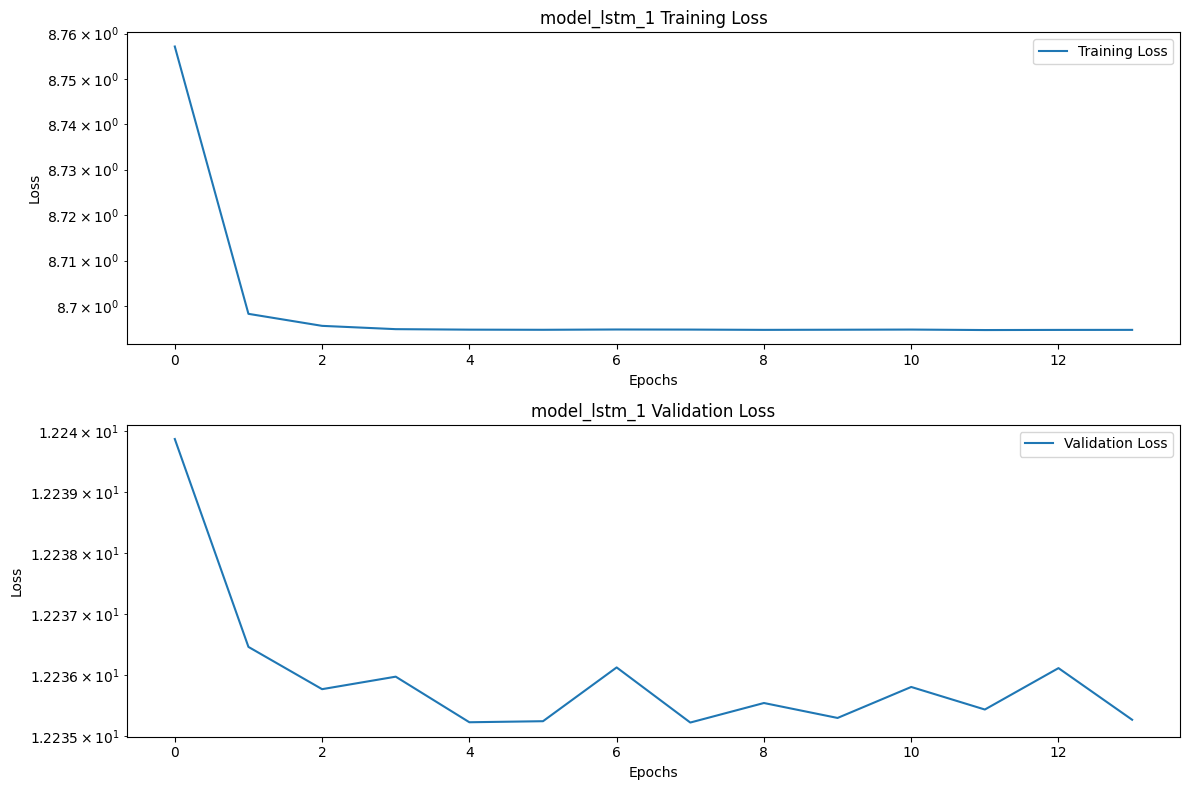

In [646]:
plot_loss(history_lstm_1, 'model_lstm_1')

In [647]:
def train_model_LSTM_1(trainX, trainY, validationX, validationY, epochs=40, batch_size=32):
    model = Sequential()
    model.add(LSTM(64, return_sequences=True, input_shape=(trainX.shape[1], trainX.shape[2])))
    model.add(LSTM(32))
    model.add(Dense(1))

    # Compile the model
    model.compile(loss='mean_absolute_error', optimizer='adam')

    # Print the model summary
    model.summary()

    # Define the EarlyStopping and ModelCheckpoint callbacks
    early_stop = EarlyStopping(monitor='val_loss', patience=6)
    checkpoint = ModelCheckpoint('best_weights.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')

    # Train the model
    history = model.fit(trainX, trainY, epochs=epochs, batch_size=batch_size, validation_data=(validationX, validationY), callbacks=[early_stop, checkpoint])

    return model, history

In [648]:
model_lstm_2, history_lstm_2 = train_model_LSTM_1(trainX, trainY, validationX, validationY)

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_25 (LSTM)              (None, 3, 64)             44544     
                                                                 
 lstm_26 (LSTM)              (None, 32)                12416     
                                                                 
 dense_100 (Dense)           (None, 1)                 33        
                                                                 
Total params: 56,993
Trainable params: 56,993
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
5341/5344 [============================>.] - ETA: 0s - loss: 8.7078
Epoch 1: val_loss improved from inf to 12.23592, saving model to best_weights.h5
5344/5344 [==============================] - 37s 6ms/step - loss: 8.7087 - val_loss: 12.2359
Epoch 2/40
5339/5344 [============================>.] - ETA:

In [649]:
# Evaluate the model
test_loss = model_lstm_2.evaluate(testX, testY)
print(f'Test loss: {test_loss}')

1393/1393 [==============================] - 4s 3ms/step - loss: 12.5600
Test loss: 12.559980392456055


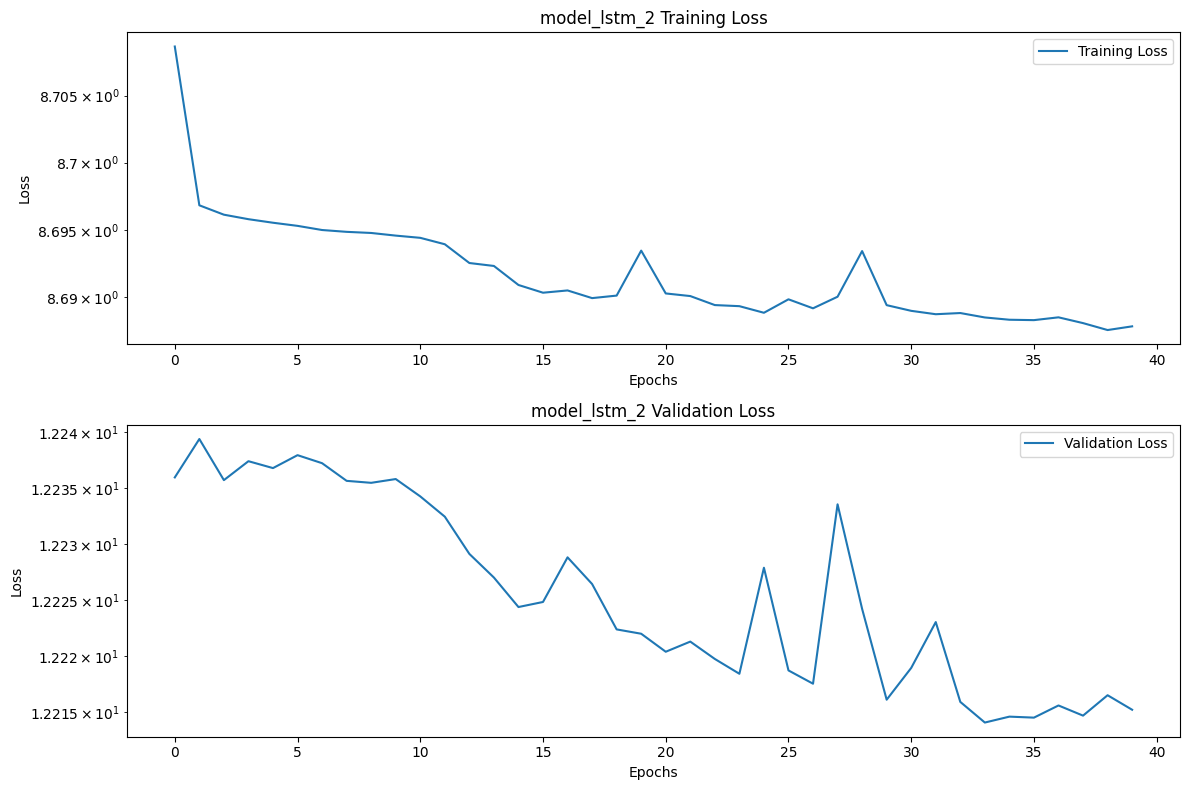

In [650]:
plot_loss(history_lstm_2, 'model_lstm_2')

In [651]:
def train_model_LSTM_2(trainX, trainY, validationX, validationY, epochs=40, batch_size=32):
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(trainX.shape[1], trainX.shape[2])))
    model.add(Dropout(0.2))
    
    model.add(LSTM(50, return_sequences=True))
    model.add(Dropout(0.2))
    
    model.add(LSTM(50))
    model.add(Dropout(0.2))
    
    model.add(Dense(1))

    # Compile the model
    model.compile(loss='mean_absolute_error', optimizer='adam')

    # Print the model summary
    model.summary()

    # Define the EarlyStopping and ModelCheckpoint callbacks
    early_stop = EarlyStopping(monitor='val_loss', patience=6)
    checkpoint = ModelCheckpoint('best_weights.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')

    # Train the model
    history = model.fit(trainX, trainY, epochs=epochs, batch_size=batch_size, validation_data=(validationX, validationY), callbacks=[early_stop, checkpoint])

    return model, history

In [652]:
model_lstm_3, history_lstm_3 = train_model_LSTM_2(trainX, trainY, validationX, validationY)

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_27 (LSTM)              (None, 3, 50)             32000     
                                                                 
 dropout_7 (Dropout)         (None, 3, 50)             0         
                                                                 
 lstm_28 (LSTM)              (None, 3, 50)             20200     
                                                                 
 dropout_8 (Dropout)         (None, 3, 50)             0         
                                                                 
 lstm_29 (LSTM)              (None, 50)                20200     
                                                                 
 dropout_9 (Dropout)         (None, 50)                0         
                                                                 
 dense_101 (Dense)           (None, 1)               

In [653]:
# Evaluate the model
test_loss = model_lstm_3.evaluate(testX, testY)
print(f'Test loss: {test_loss}')

1393/1393 [==============================] - 5s 3ms/step - loss: 12.5809
Test loss: 12.580880165100098


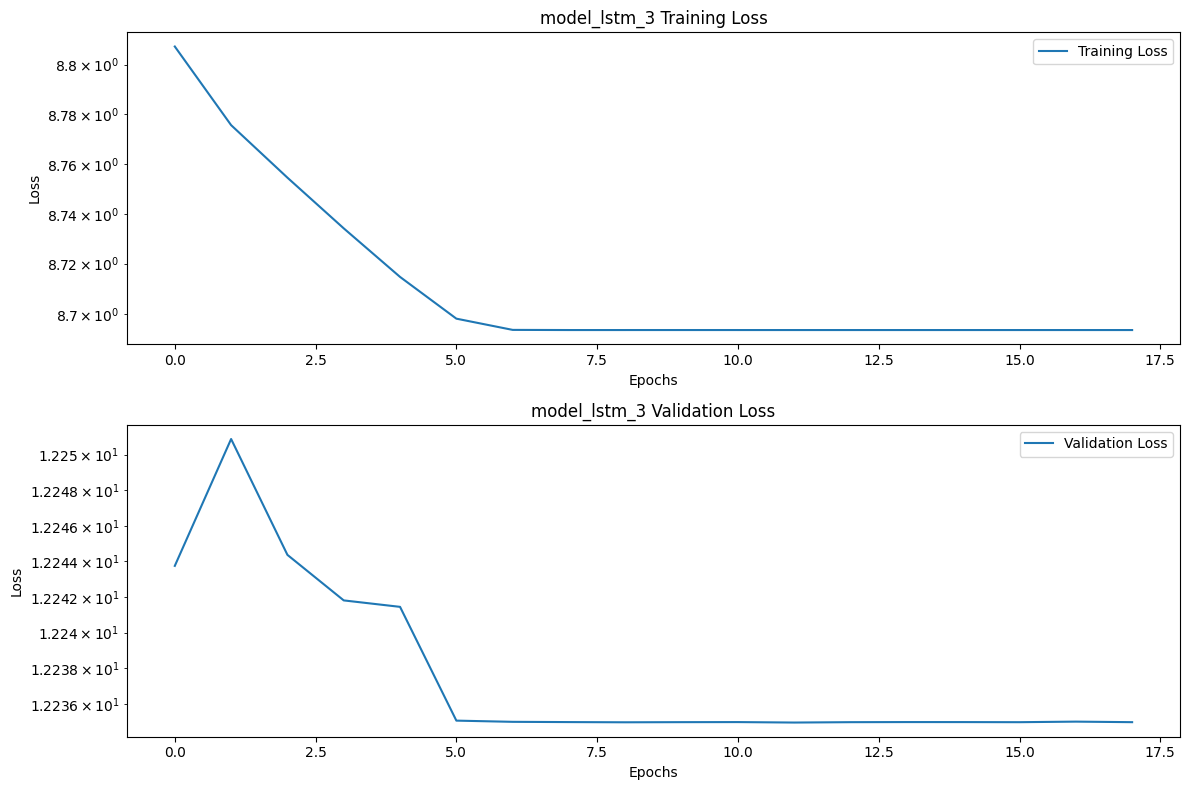

In [654]:
plot_loss(history_lstm_3, 'model_lstm_3')

In [655]:
def train_model_LSTM_3(trainX, trainY, validationX, validationY, epochs=40, batch_size=32):
    model = Sequential()
    model.add(LSTM(64, activation='relu', return_sequences=True, input_shape=(trainX.shape[1], trainX.shape[2])))
    model.add(LSTM(32, activation='relu'))
    model.add(Dense(1))

    # Compile the model
    model.compile(loss='mean_absolute_error', optimizer='adam')

    # Print the model summary
    model.summary()

    # Define the EarlyStopping and ModelCheckpoint callbacks
    early_stop = EarlyStopping(monitor='val_loss', patience=6)
    checkpoint = ModelCheckpoint('best_weights.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')

    # Train the model
    history = model.fit(trainX, trainY, epochs=epochs, batch_size=batch_size, validation_data=(validationX, validationY), callbacks=[early_stop, checkpoint])

    return model, history

In [656]:
model_lstm_4, history_lstm_4 = train_model_LSTM_3(trainX, trainY, validationX, validationY)

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_30 (LSTM)              (None, 3, 64)             44544     
                                                                 
 lstm_31 (LSTM)              (None, 32)                12416     
                                                                 
 dense_102 (Dense)           (None, 1)                 33        
                                                                 
Total params: 56,993
Trainable params: 56,993
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
5337/5344 [============================>.] - ETA: 0s - loss: 16503.5156
Epoch 1: val_loss improved from inf to 12.68780, saving model to best_weights.h5
5344/5344 [==============================] - 28s 5ms/step - loss: 16482.4902 - val_loss: 12.6878
Epoch 2/40
5333/5344 [============================>.

In [657]:
# Evaluate the model
test_loss = model_lstm_4.evaluate(testX, testY)
print(f'Test loss: {test_loss}')

1393/1393 [==============================] - 3s 2ms/step - loss: 12.5809
Test loss: 12.580897331237793


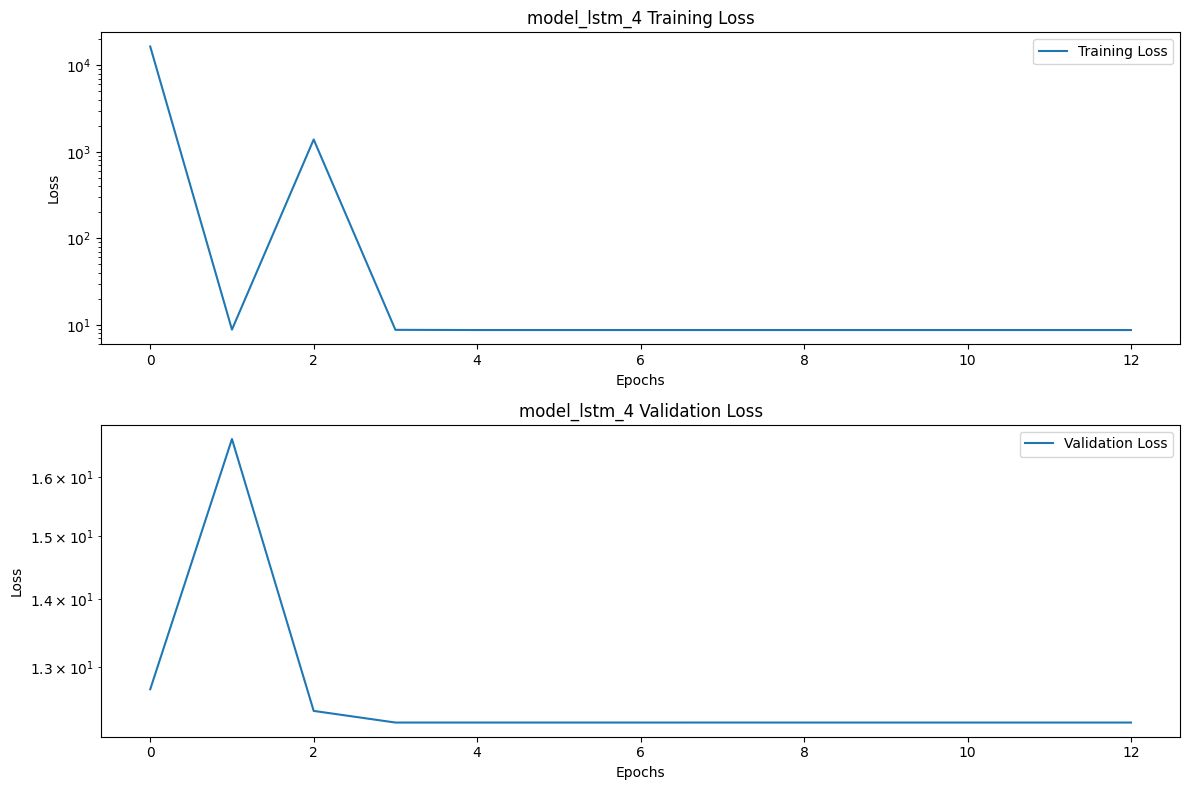

In [658]:
plot_loss(history_lstm_4, 'model_lstm_4')

In [659]:
def train_model_LSTM_4(trainX, trainY, validationX, validationY, epochs=40, batch_size=32):
    model = Sequential()
    model.add(LSTM(64, activation='relu', return_sequences=True, input_shape=(trainX.shape[1], trainX.shape[2])))
    model.add(LSTM(32, activation='relu', return_sequences=True))
    model.add(LSTM(16, activation='relu', return_sequences=True))
    model.add(LSTM(8, activation='relu'))
    model.add(Dense(1))

    # Compile the model
    model.compile(loss='mean_absolute_error', optimizer='adam')

    # Print the model summary
    model.summary()

    # Define the EarlyStopping and ModelCheckpoint callbacks
    early_stop = EarlyStopping(monitor='val_loss', patience=6)
    checkpoint = ModelCheckpoint('best_weights.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')

    # Train the model
    history = model.fit(trainX, trainY, epochs=epochs, batch_size=batch_size, validation_data=(validationX, validationY), callbacks=[early_stop, checkpoint])

    return model, history

In [660]:
model_lstm_5, history_lstm_5 = train_model_LSTM_4(trainX, trainY, validationX, validationY)

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_32 (LSTM)              (None, 3, 64)             44544     
                                                                 
 lstm_33 (LSTM)              (None, 3, 32)             12416     
                                                                 
 lstm_34 (LSTM)              (None, 3, 16)             3136      
                                                                 
 lstm_35 (LSTM)              (None, 8)                 800       
                                                                 
 dense_103 (Dense)           (None, 1)                 9         
                                                                 
Total params: 60,905
Trainable params: 60,905
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
5336/5344 [===========================

In [661]:
# Evaluate the model
test_loss = model_lstm_5.evaluate(testX, testY)
print(f'Test loss: {test_loss}')

1393/1393 [==============================] - 4s 3ms/step - loss: 12.5809
Test loss: 12.580894470214844


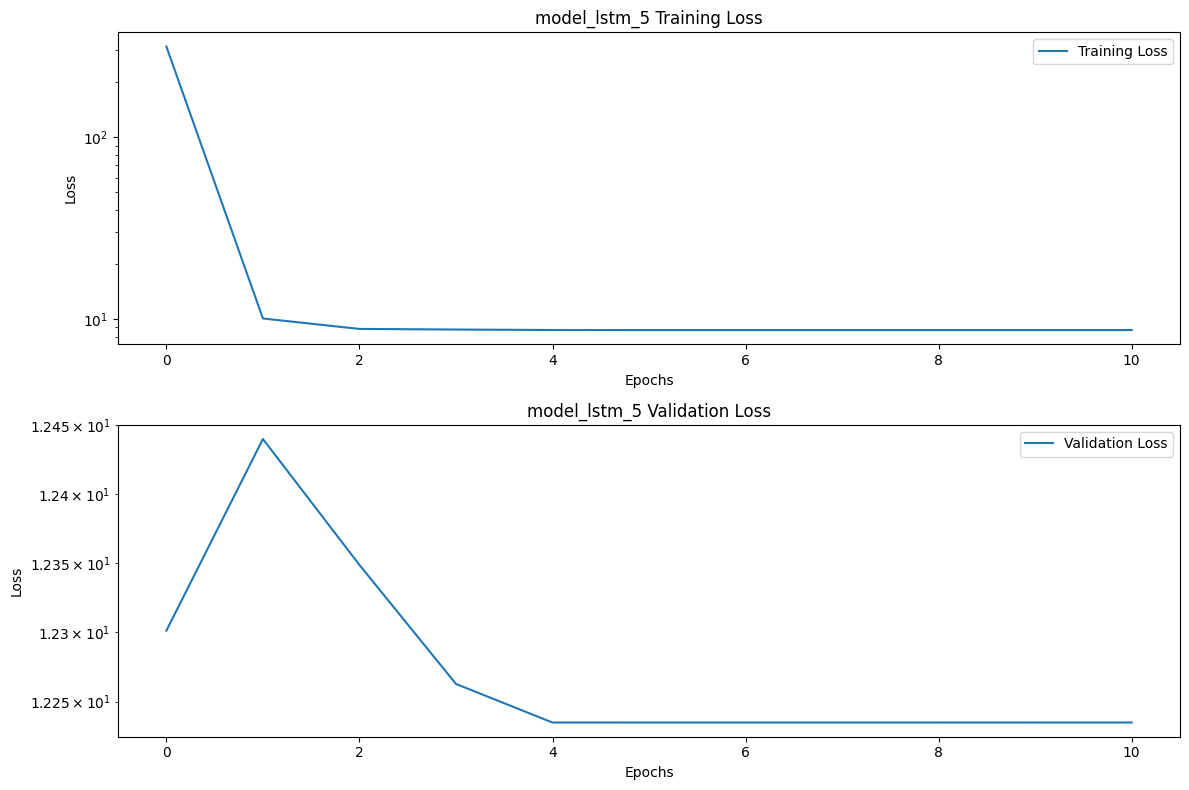

In [662]:
plot_loss(history_lstm_5, 'model_lstm_5')

In [663]:
model_lstm_4.save('lstm_model.h5')

In [664]:
# Load the trained model
model_lstm = keras.models.load_model('lstm_model.h5')
model_lstm.summary()

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_30 (LSTM)              (None, 3, 64)             44544     
                                                                 
 lstm_31 (LSTM)              (None, 32)                12416     
                                                                 
 dense_102 (Dense)           (None, 1)                 33        
                                                                 
Total params: 56,993
Trainable params: 56,993
Non-trainable params: 0
_________________________________________________________________


In [665]:
mae = mean_absolute_error(testY, y_pred_lstm)
mae

12.580987840704946

1393/1393 [==============================] - 3s 2ms/step


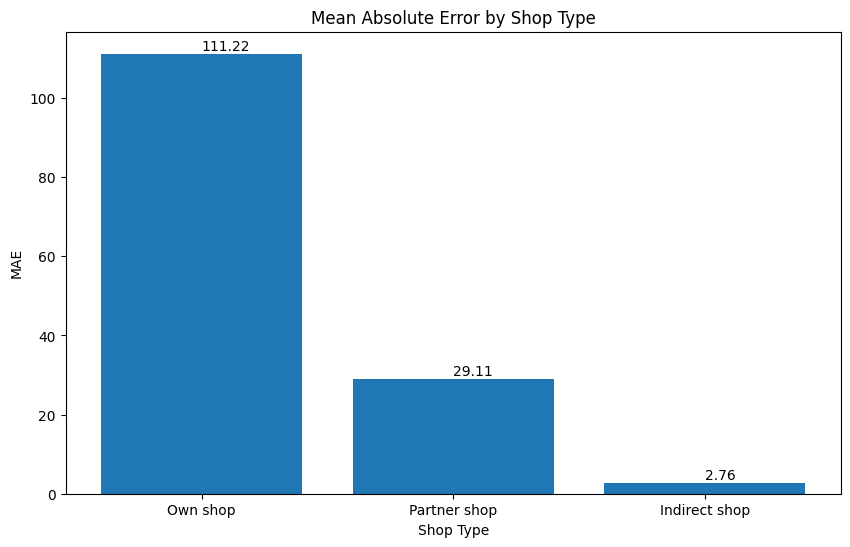

In [666]:
#shop_type_mapping = {0: 'Indirect shop', 1: 'Own shop', 2: 'Partner shop'}
y_pred_lstm = model_lstm.predict(testX)

mae_lstm_by_shop_type = {}

column_index = 2

unique_shop_types = np.unique(testX[:, 0, column_index])

shop_type_mapping = {0: 'Indirect shop', 1: 'Own shop', 2: 'Partner shop'}

for shop_type in unique_shop_types:
    mask = testX[:, 0, column_index] == shop_type
    mae2 = mean_absolute_error(testY[mask], y_pred_lstm[mask])
    mae_lstm_by_shop_type[shop_type_mapping[shop_type]] = mae2  # Use the mapping here

sorted_data = sorted(mae_lstm_by_shop_type.items(), key=lambda x: x[1], reverse=True)
shop_types, mae2_values = zip(*sorted_data)

x_ticks = range(len(shop_types))

plt.figure(figsize=(10, 6))
bars = plt.bar(x_ticks, mae_values)
plt.xlabel('Shop Type')
plt.ylabel('MAE')
plt.title('Mean Absolute Error by Shop Type')
plt.xticks(x_ticks, shop_types)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 2), va='bottom')
    
plt.show()

In [667]:
mae2

27.892499996379097

In [668]:
mae_lstm_by_shop_type

{'Indirect shop': 3.744272861918999,
 'Own shop': 98.74078318720724,
 'Partner shop': 27.892499996379097}

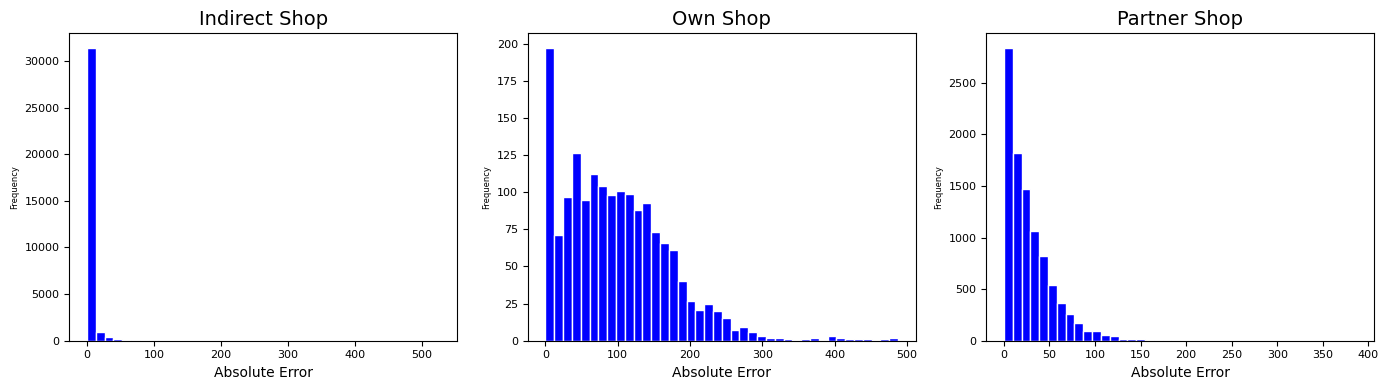

In [669]:
abs_error = np.abs(testY - y_pred_lstm.flatten())

shop_types = np.unique(testX[:, 0, 2])

shop_type_names = ["Indirect Shop", "Own Shop", "Partner Shop"]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14,4))
axes = axes.flatten()

for i, shop_type in enumerate(shop_types):
    idx = testX[:, 0, 2] == shop_type
    axes[i].hist(abs_error[idx], bins=40, histtype="barstacked", color="blue", rwidth=6, edgecolor="white")
    axes[i].set_title(f"{shop_type_names[i]}", fontsize=14)
    axes[i].set_xlabel("Absolute Error", fontsize=10)
    axes[i].set_ylabel("Frequency", fontsize=6)
    axes[i].tick_params(axis='both', which='major', labelsize=8) 
    
plt.tight_layout()
plt.show()

In [670]:
metrics_lstm = evaluate_preds(testY,  y_pred_lstm.flatten())
metrics_lstm

{'mae': 12.58099, 'mse': 1052.1201, 'rmse': 32.4364}

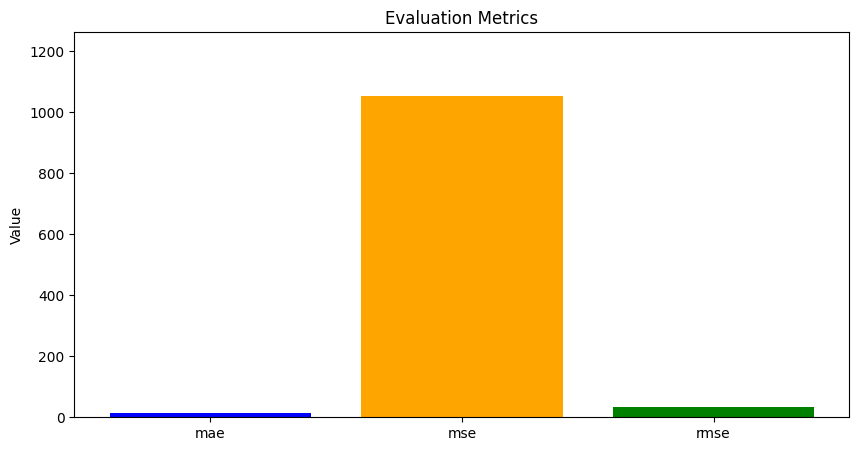

In [671]:
# Plot the metrics
plot_metrics(metrics_lstm)

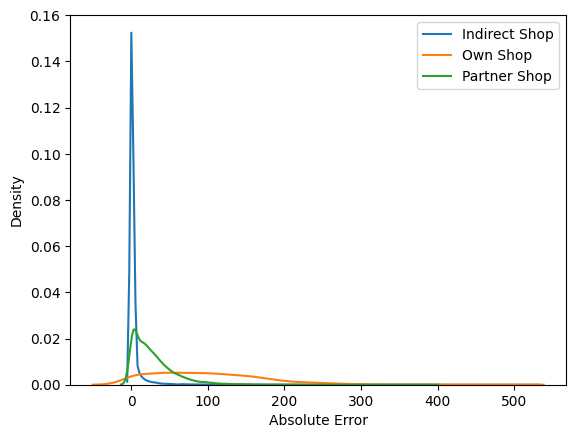

In [672]:
shop_type_array = testX[:, 0, 2]


shop_types = np.unique(shop_type_array)
shop_type_names = ["Indirect Shop", "Own Shop", "Partner Shop"]  

for i, shop_type in enumerate(shop_types):
    idx = shop_type_array == shop_type
    sns.kdeplot(abs_error[idx], label=shop_type_names[i])

plt.xlabel('Absolute Error')
plt.ylabel('Density')
plt.legend()
plt.show()

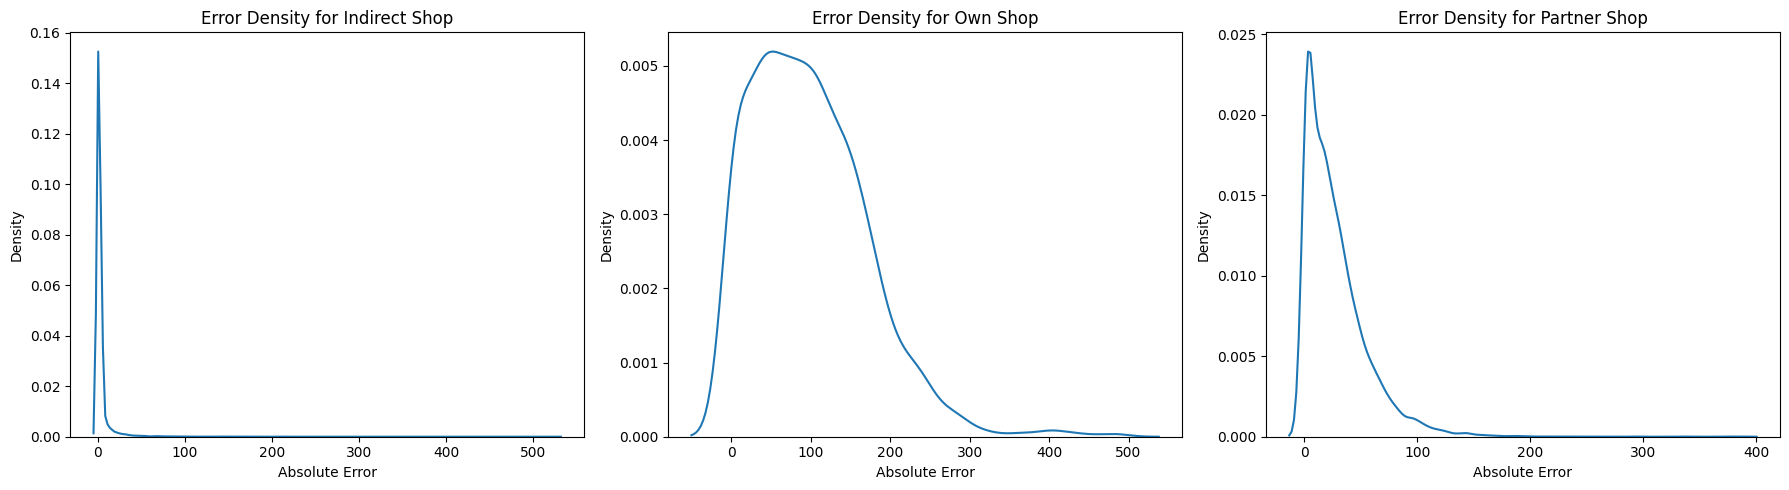

In [673]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18,5))
axes = axes.flatten() 

shop_type_array = testX[:, 0, 2] 

shop_types = np.unique(shop_type_array)
shop_type_names = ["Indirect Shop", "Own Shop", "Partner Shop"] 

for i, shop_type in enumerate(shop_types):
    idx = shop_type_array == shop_type
    sns.kdeplot(abs_error[idx], ax=axes[i])
    axes[i].set_title(f"Error Density for {shop_type_names[i]}")
    axes[i].set_xlabel("Absolute Error")
    axes[i].set_ylabel("Density")

plt.tight_layout()
plt.show()